In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("quiz1_dataset.csv", header=None)

K-Fold CV

In [2]:
# K-fold CV
from random import seed
from random import randrange
 
# Split a dataset into k folds
def cross_validation_split(dataset, folds=5):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / folds)
	for i in range(folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(index)
		dataset_split.append(fold)
	return dataset_split          #indices are given

In [3]:
class regression:
  # Constructor
    def __init__(self, name='reg'):
        self.name = name  # Create an instance variable
    
    def grad_update(self,w_old,lr,y,x):
        return w_old + 2*lr*(x @ (y - x.T @ w_old))/y.shape[0]

    def error(self,w,y,x):
        return np.mean(np.square(y - x.T @ w))

    def mat_inv(self,y,x_aug):
        return np.linalg.pinv(x_aug @ x_aug.T) @ x_aug @ y
    # by Gradien descent
    def Regression_grad_des(self,x,y,lr):
        err = []
        #w_pred = np.random.rand(len(x),1)  #random w_pred
        w_pred=np.zeros(x.shape[0])
        for i in range(1000):
            err.append(self.error(w_pred,y,x))
            w_pred = self.grad_update(w_pred,lr,y,x)
        err = np.asarray(err)
        return w_pred , err

Calling Different Folds

In [4]:
# k: Feature Number: 0,1,2
# n:Fold Number
#n=1: Train:[0,1,2,3] Test: [4]
#n=2: Train:[0,1,2,4] Test: [3]
#n=3: Train:[0,1,4,3] Test: [2]
#n=4: Train:[0,4,2,3] Test: [1]
#n=5: Train:[5,1,2,3] Test: [0]
def fold(k,n,df):
    seed(1)
    index1=cross_validation_split(df[k],5) # Provided indices
    index1=pd.DataFrame(data=index1)
    index1=index1.T
    S=np.array([0,1,2,3,4]) # Number of folds
    #testing set
    X_list=list()
    Y_list=list()
    list_df0 = list(df[k])
    list_df3 = list(df[3])
    for i in index1[5-n]:
        X_list.append(list_df0[i])
        Y_list.append(list_df3[i])
    dt = pd.DataFrame()
    dt['X_test']  = X_list
    dt['Y_test']  = Y_list 
    S=np.delete(S, 5-n)
    # training set
    X_list=list()
    Y_list=list()
    list_df0 = list(df[k])
    list_df3 = list(df[3])
    for j in S:
        for i in index1[j]:
            X_list.append(list_df0[i])
            Y_list.append(list_df3[i])
    dx = pd.DataFrame()
    dx['X_train']  = X_list
    dx['Y_train']  = Y_list

    x_train=np.array(dx['X_train'])
    y_train=np.array(dx['Y_train'])
    x_test=np.array(dt['X_test'])
    y_test=np.array(dt['Y_test'])
    
    x_mean = x_train.mean(axis=0)
    x_stdev = x_train.std(axis=0)
    x_train_norm = (x_train - x_mean)/(x_stdev)
    x_train_norm_aug = np.c_[np.ones((x_train_norm.shape[0], 1)), x_train_norm]
    x_test_norm = (x_test - x_mean)/(x_stdev)
    x_test_norm_aug = np.c_[np.ones((x_test_norm.shape[0], 1)), x_test_norm]
    
    return x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug,x_test_norm,x_test_norm_aug

 

Univariate Linear Regression

In [5]:
def Linear_Reg_Mat_inv(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug):
    # Linear Rgression:Matrix Inversion
    print(" Linear Rgression:Matrix Inversion ")
    reg = regression()
    w_pred_mat_inv = reg.mat_inv(y_train,x_train_norm_aug.T)
    print("Parameters")
    print(w_pred_mat_inv)
    train_error = reg.error(w_pred_mat_inv, y_train, x_train_norm_aug.T)/((np.max(y_train)-np.mean(y_train))**2)
    test_error = reg.error(w_pred_mat_inv, y_test, x_test_norm_aug.T)/((np.max(y_test)-np.mean(y_test))**2)
    print('Normalized training error = ', train_error)
    print('Normalized testing error = ', test_error)
    y_test_pred = np.dot(x_test_norm_aug, w_pred_mat_inv)
    # plot data and predictions
    yhat = np.dot(x_train_norm_aug, w_pred_mat_inv)
    plt.scatter(x_train, y_train)
    plt.plot(x_train, yhat, color='red')
    plt.title("Linear regression: Matrix Inversion")
    plt.show()   

Feature No: 0
1  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[4.57675515 1.25268071]
Normalized training error =  0.041787043354042964
Normalized testing error =  0.09285783863376906


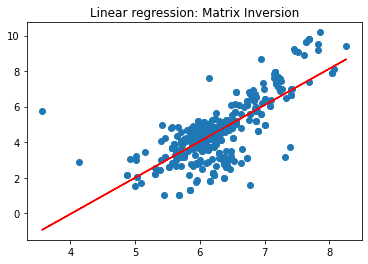

2  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[4.61031186 1.19237868]
Normalized training error =  0.04692222966888748
Normalized testing error =  0.042365869932810316


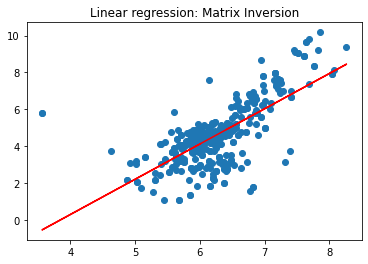

3  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[4.63071649 1.18772943]
Normalized training error =  0.04651324018649521
Normalized testing error =  0.04707534706095342


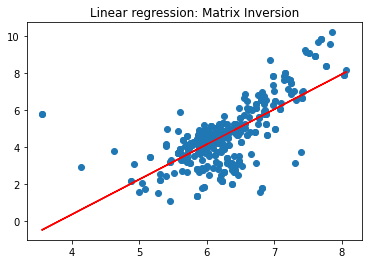

4  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[4.6095     1.17410415]
Normalized training error =  0.04560742551503285
Normalized testing error =  0.04871568703573343


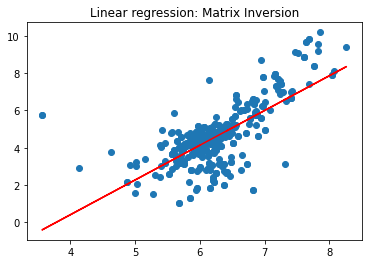

5  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[4.56814948 1.154507  ]
Normalized training error =  0.04971445493490173
Normalized testing error =  0.05198225282191661


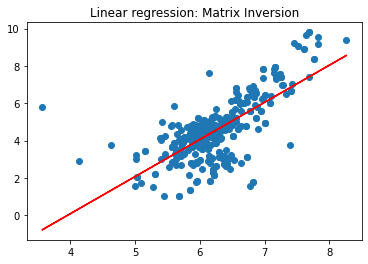

Feature No: 1
1  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[ 4.57675515 -1.30677645]
Normalized training error =  0.03738497259977121
Normalized testing error =  0.05651724085171595


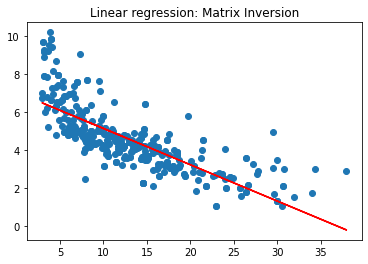

2  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[ 4.61031186 -1.31957781]
Normalized training error =  0.036640762230654614
Normalized testing error =  0.044620437917346774


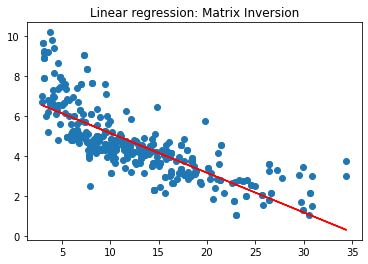

3  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[ 4.63071649 -1.29950311]
Normalized training error =  0.0375016828517837
Normalized testing error =  0.04296314141622927


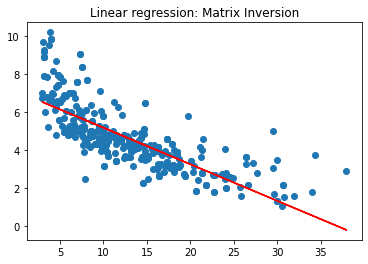

4  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[ 4.6095     -1.26813149]
Normalized training error =  0.03822032412481498
Normalized testing error =  0.037222556262193944


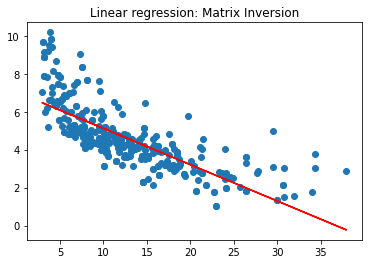

5  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[ 4.56814948 -1.25852537]
Normalized training error =  0.040569087309196374
Normalized testing error =  0.04466463070238291


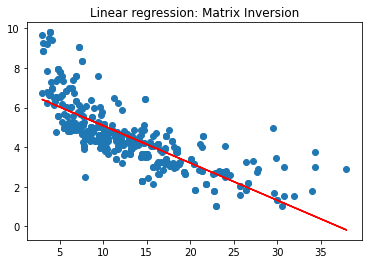

Feature No: 2
1  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[ 4.57675515 -0.87623291]
Normalized training error =  0.06726759724685726
Normalized testing error =  0.09397385088055568


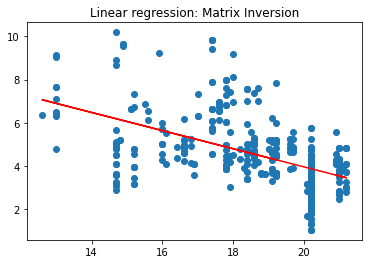

2  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[ 4.61031186 -0.949626  ]
Normalized training error =  0.0636540538562796
Normalized testing error =  0.08573067122778931


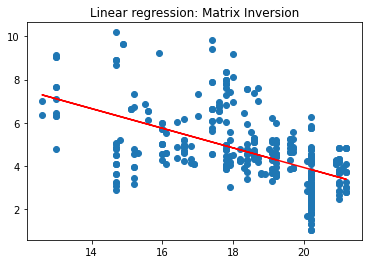

3  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[ 4.63071649 -0.93273615]
Normalized training error =  0.06404009045129529
Normalized testing error =  0.08808721787375409


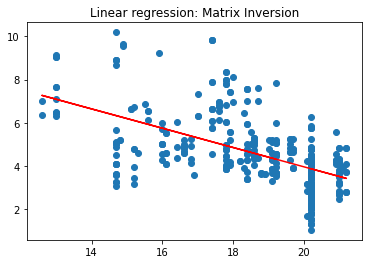

4  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[ 4.6095     -0.82197019]
Normalized training error =  0.06821828047617721
Normalized testing error =  0.06506336435079935


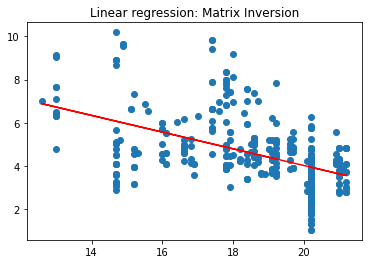

5  - Fold
 Linear Rgression:Matrix Inversion 
Parameters
[ 4.56814948 -0.81018257]
Normalized training error =  0.07436291344655847
Normalized testing error =  0.07082430999269178


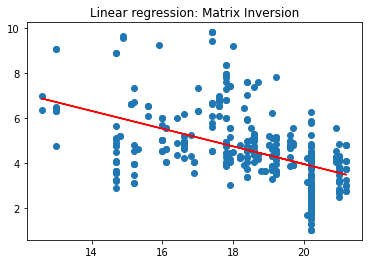

In [6]:
for k in range(0,3): #Feature
    print("Feature No:",k)
    for f in range(1,6):
        print(f," - Fold")
        x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug=fold(k,f,df)
        Linear_Reg_Mat_inv(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug)

In [9]:
def Linear_Reg_GradientDescet(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug):
    print("Gradient Descent Method ")
    lr = 0.01
    reg=regression()
    w_pred,err = reg.Regression_grad_des(x_train_norm_aug.T,y_train,lr)
    print("Parameters:")
    print(w_pred)
    plt.xlim(right=70) 
    plt.title("error")
    plt.plot(err)
    plt.show()
    train_error = reg.error(w_pred, y_train, x_train_norm_aug.T)/((np.max(y_train)-np.mean(y_train))**2)
    test_error = reg.error(w_pred, y_test, x_test_norm_aug.T)/((np.max(y_test)-np.mean(y_test))**2)

    print('Normalized training error = ', train_error)
    print('Normalized testing error = ', test_error)

    yhat = np.dot(x_train_norm_aug, w_pred)
    plt.scatter(x_train, y_train)
    plt.plot(x_train, yhat, color='red')
    plt.title("Linear Regression: Gradient Decent")
    plt.show()

Feature No: 0
1  - Fold
Gradient Descent Method 
Parameters:
[4.57675515 1.25268071]


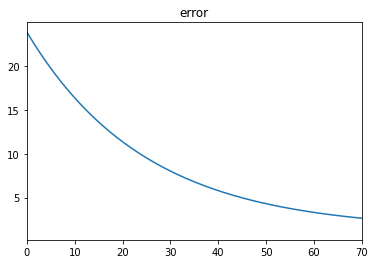

Normalized training error =  0.041787043354042964
Normalized testing error =  0.09285783866506492


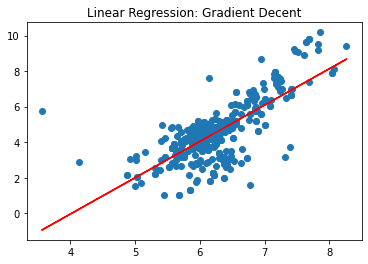

2  - Fold
Gradient Descent Method 
Parameters:
[4.61031185 1.19237868]


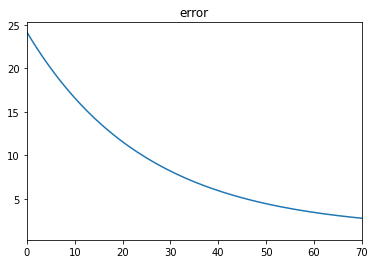

Normalized training error =  0.04692222966888748
Normalized testing error =  0.0423658699171676


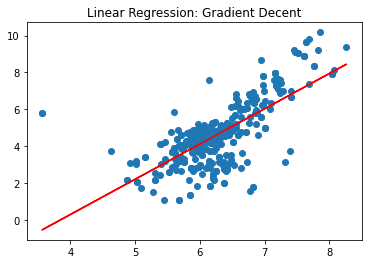

3  - Fold
Gradient Descent Method 
Parameters:
[4.63071649 1.18772943]


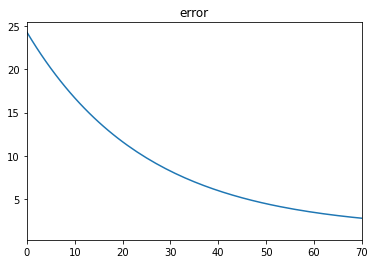

Normalized training error =  0.04651324018649522
Normalized testing error =  0.04707534701373255


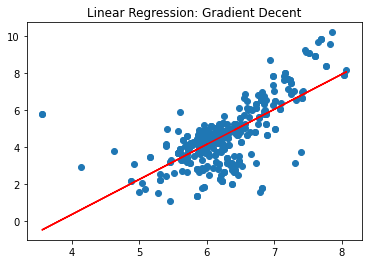

4  - Fold
Gradient Descent Method 
Parameters:
[4.60949999 1.17410415]


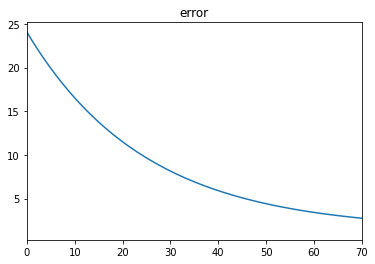

Normalized training error =  0.045607425515032864
Normalized testing error =  0.04871568701774005


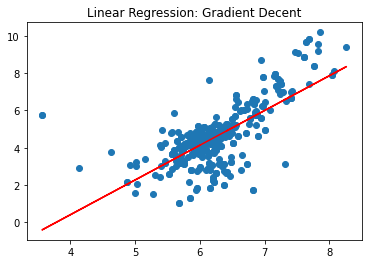

5  - Fold
Gradient Descent Method 
Parameters:
[4.56814948 1.154507  ]


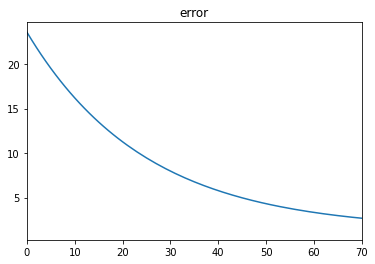

Normalized training error =  0.04971445493490173
Normalized testing error =  0.05198225286468203


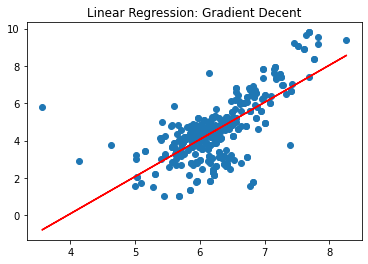

Feature No: 1
1  - Fold
Gradient Descent Method 
Parameters:
[ 4.57675515 -1.30677645]


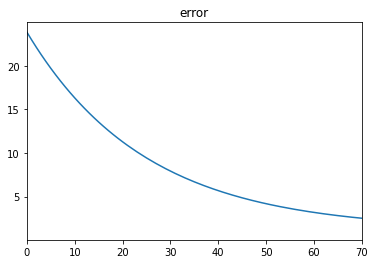

Normalized training error =  0.037384972599771214
Normalized testing error =  0.056517240822028955


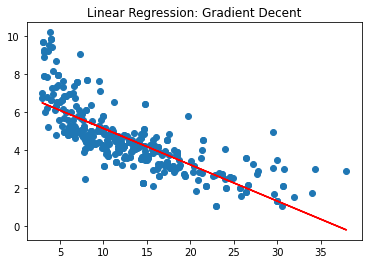

2  - Fold
Gradient Descent Method 
Parameters:
[ 4.61031185 -1.31957781]


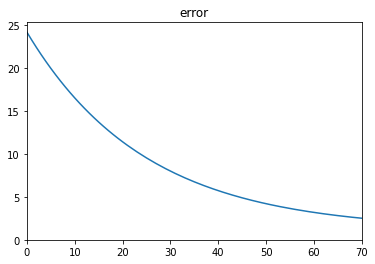

Normalized training error =  0.03664076223065461
Normalized testing error =  0.0446204378957129


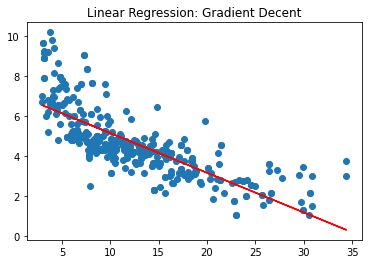

3  - Fold
Gradient Descent Method 
Parameters:
[ 4.63071649 -1.29950311]


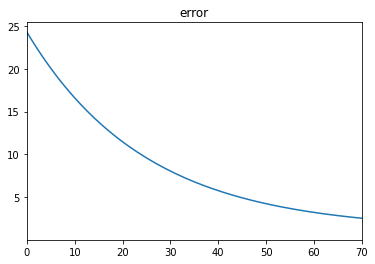

Normalized training error =  0.0375016828517837
Normalized testing error =  0.04296314131540801


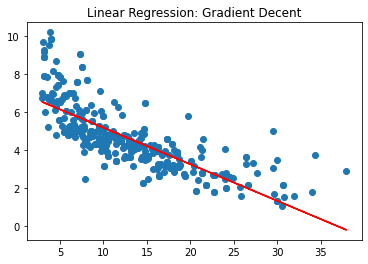

4  - Fold
Gradient Descent Method 
Parameters:
[ 4.60949999 -1.26813148]


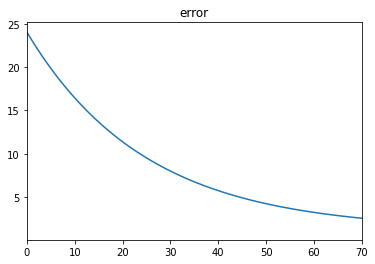

Normalized training error =  0.03822032412481497
Normalized testing error =  0.03722255628877065


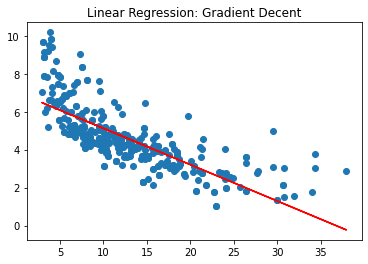

5  - Fold
Gradient Descent Method 
Parameters:
[ 4.56814948 -1.25852536]


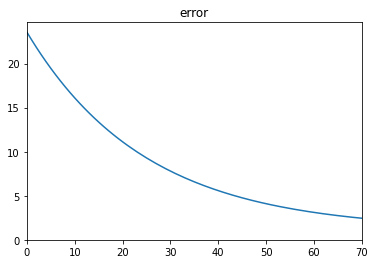

Normalized training error =  0.04056908730919638
Normalized testing error =  0.044664630805685786


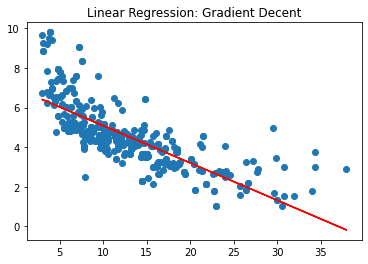

Feature No: 2
1  - Fold
Gradient Descent Method 
Parameters:
[ 4.57675515 -0.87623291]


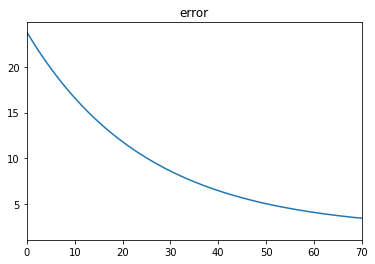

Normalized training error =  0.06726759724685724
Normalized testing error =  0.09397385091262296


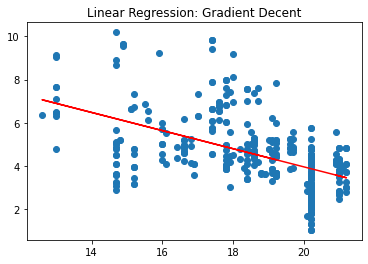

2  - Fold
Gradient Descent Method 
Parameters:
[ 4.61031185 -0.949626  ]


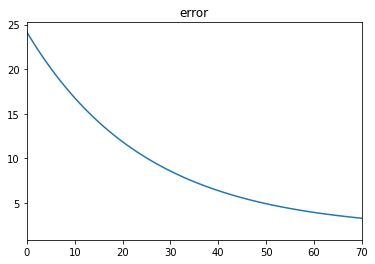

Normalized training error =  0.06365405385627962
Normalized testing error =  0.08573067114811977


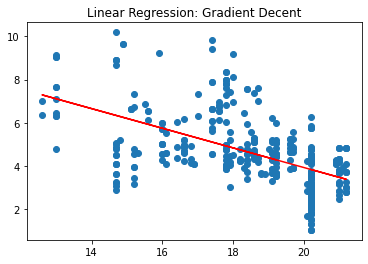

3  - Fold
Gradient Descent Method 
Parameters:
[ 4.63071649 -0.93273615]


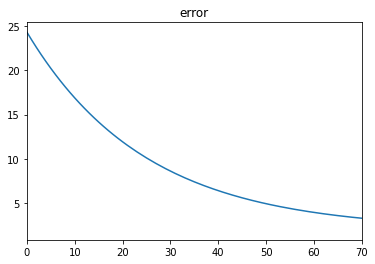

Normalized training error =  0.06404009045129529
Normalized testing error =  0.08808721773921818


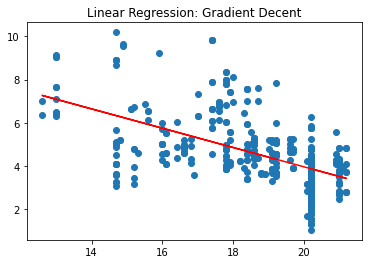

4  - Fold
Gradient Descent Method 
Parameters:
[ 4.60949999 -0.82197019]


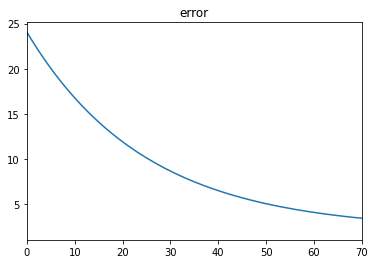

Normalized training error =  0.06821828047617721
Normalized testing error =  0.06506336437146276


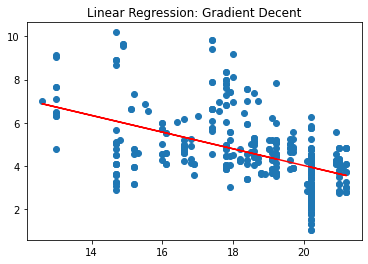

5  - Fold
Gradient Descent Method 
Parameters:
[ 4.56814948 -0.81018257]


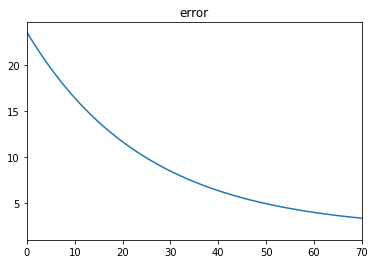

Normalized training error =  0.07436291344655847
Normalized testing error =  0.07082431013153806


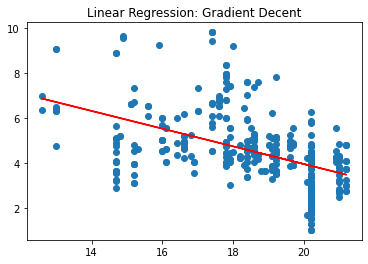

In [10]:
for k in range(0,3): #Feature
    print("Feature No:",k)
    for f in range(1,6):
        print(f," - Fold")
        x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug=fold(k,f,df)
        Linear_Reg_GradientDescet(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug)

Polynomial Regression

In [24]:
def data_transform(X,degree): 
    X_new=np.ones((X.shape[0],1))
    for i in range(1,degree+1): 
        X_new = np.c_[X_new,X**i]
    return X_new.T

def Poly_Reg_Mat_inv(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug,deg):
    reg=regression()
    for degree in range(0,deg+1):
        X_1=data_transform(x_train_norm,degree)
        w_mat = reg.mat_inv(y_train, X_1)
        print("Parameters")
        print(w_mat)
        y_pred=X_1.T @ w_mat
        plt.title(degree)
        plt.plot(x_train.T,y_train,'.')
        plt.scatter(x_train.T,y_pred,color='black')
        plt.show()
        train_error = reg.error(w_mat, y_train, X_1)/((np.max(y_train)-np.mean(y_train))**2)
        X_1=data_transform(x_test_norm,degree)
        test_error = reg.error(w_mat, y_test, X_1)/((np.max(y_test)-np.mean(y_test))**2)
        print('Normalized training error = ', train_error)
        print('Normalized testing error = ', test_error)
        
def Poly_Reg_Grad_Des(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug,deg):
    reg=regression()
    lr = 0.01
    for degree in range(0,deg+1):
        X_0=data_transform(x_train_norm,degree)
        w_pred,err = reg.Regression_grad_des(X_0,y_train,lr)
        print("Parameters")
        print(w_pred)
        plt.xlim(right=70)
        plt.title("error")
        plt.plot(err)
        plt.show()
        yhat = np.dot(X_0.T, w_pred)
        plt.scatter(x_train, y_train)
        plt.scatter(x_train, yhat, color='red')
        plt.title(degree)
        plt.show()
        train_error = reg.error(w_pred, y_train, X_0)/((np.max(y_train)-np.mean(y_train))**2)
        X_0=data_transform(x_test_norm,degree)
        test_error = reg.error(w_pred, y_test, X_0)/((np.max(y_test)-np.mean(y_test))**2)
        print('Normalized training error = ', train_error)
        print('Normalized testing error = ', test_error) 

Feature No: 0
1  - Fold
Parameters
[4.57675515]


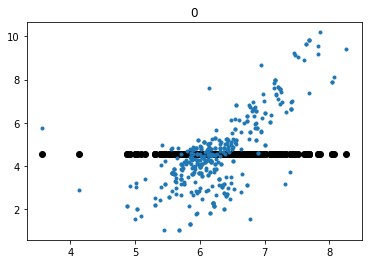

Normalized training error =  0.09167857605784512
Normalized testing error =  0.13523788913257284
Parameters
[4.57675515 1.25268071]


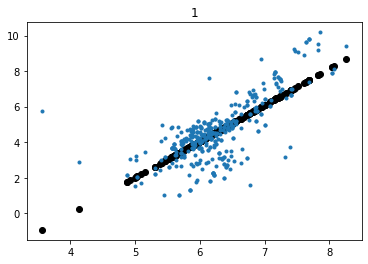

Normalized training error =  0.041787043354042964
Normalized testing error =  0.09285783863376906
Parameters
[4.31848501 1.17416934 0.25827014]


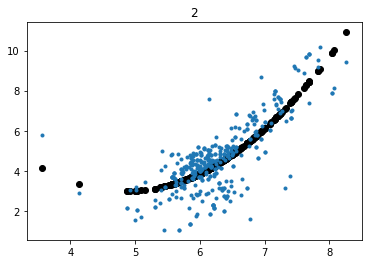

Normalized training error =  0.034642639279709606
Normalized testing error =  0.05880560814195384
Parameters
[ 4.34151611  1.27180544  0.24154563 -0.02074608]


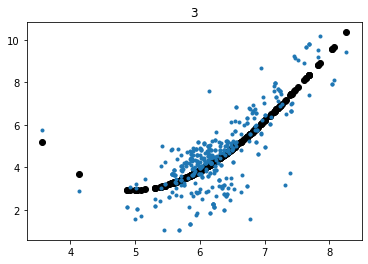

Normalized training error =  0.03439602072825967
Normalized testing error =  0.058401025174385175
Parameters
[ 4.320358    1.28990673  0.28692522 -0.02904667 -0.00486378]


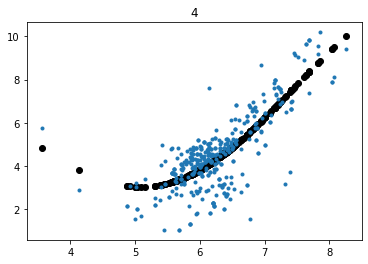

Normalized training error =  0.03434103971478306
Normalized testing error =  0.05824410233926396
2  - Fold
Parameters
[4.61031186]


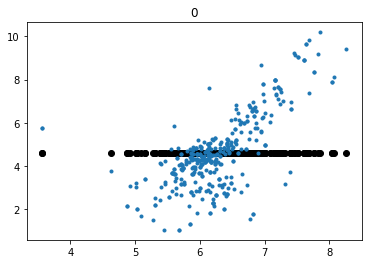

Normalized training error =  0.09267182404591212
Normalized testing error =  0.09372812437458398
Parameters
[4.61031186 1.19237868]


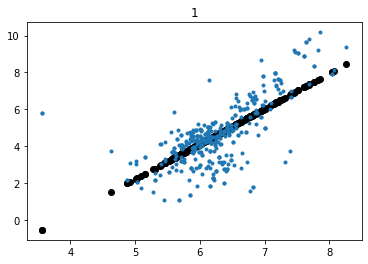

Normalized training error =  0.04692222966888748
Normalized testing error =  0.042365869932810316
Parameters
[4.32149711 1.15201531 0.28881475]


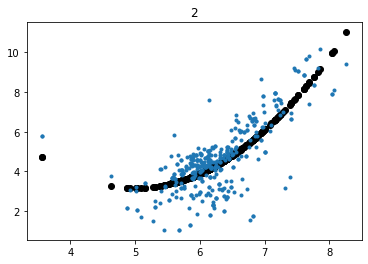

Normalized training error =  0.03661632087866297
Normalized testing error =  0.032953085089822434
Parameters
[ 4.35885935  1.28724618  0.25520682 -0.02686351]


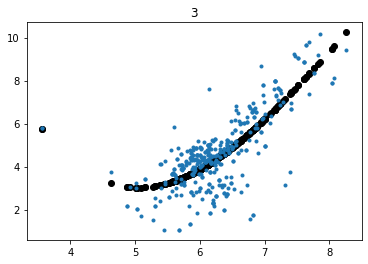

Normalized training error =  0.03613408309862134
Normalized testing error =  0.03423438765016956
Parameters
[ 4.32547496  1.32178338  0.32811251 -0.04237203 -0.00768732]


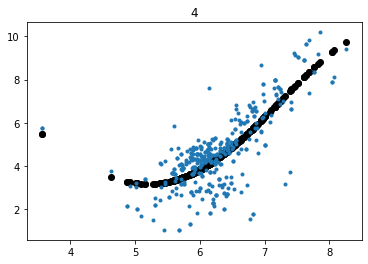

Normalized training error =  0.036000653316342404
Normalized testing error =  0.034466077792027525
3  - Fold
Parameters
[4.63071649]


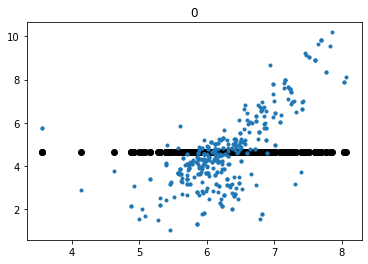

Normalized training error =  0.09224089720379952
Normalized testing error =  0.1013724257701077
Parameters
[4.63071649 1.18772943]


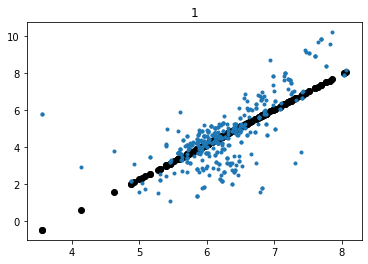

Normalized training error =  0.04651324018649521
Normalized testing error =  0.04707534706095342
Parameters
[4.32557497 1.1828152  0.30514153]


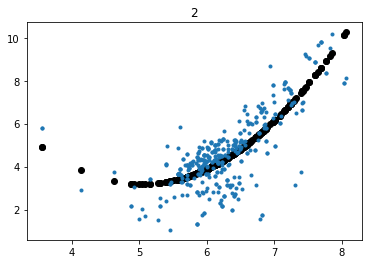

Normalized training error =  0.034990295765126675
Normalized testing error =  0.04253247703390112
Parameters
[ 4.35067249  1.26200439  0.28030736 -0.01635279]


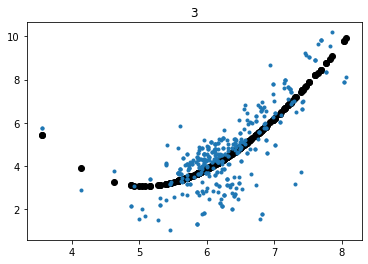

Normalized training error =  0.03483624142284906
Normalized testing error =  0.04205992171490359
Parameters
[ 4.33569736e+00  1.28304697e+00  3.15812207e-01 -2.58459645e-02
 -4.22923230e-03]


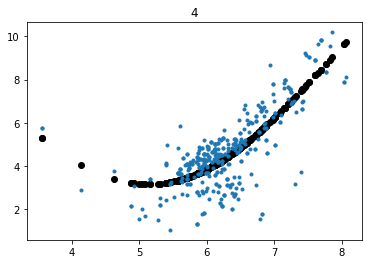

Normalized training error =  0.034804490909409534
Normalized testing error =  0.04179814025833877
4  - Fold
Parameters
[4.6095]


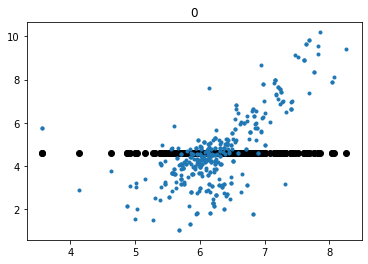

Normalized training error =  0.08995252213172565
Normalized testing error =  0.1059889871532327
Parameters
[4.6095     1.17410415]


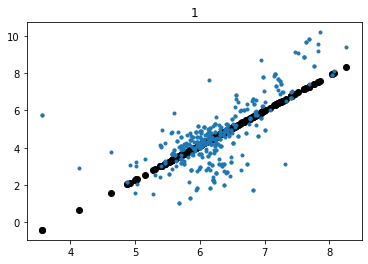

Normalized training error =  0.04560742551503285
Normalized testing error =  0.04871568703573343
Parameters
[4.30830601 1.13080252 0.30119399]


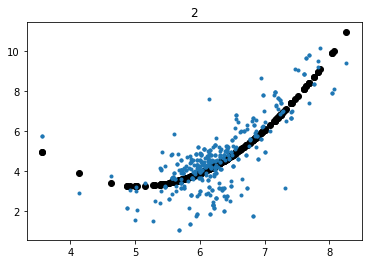

Normalized training error =  0.03393163038624843
Normalized testing error =  0.04536254158437289
Parameters
[ 4.33158889  1.21719642  0.28029853 -0.01660622]


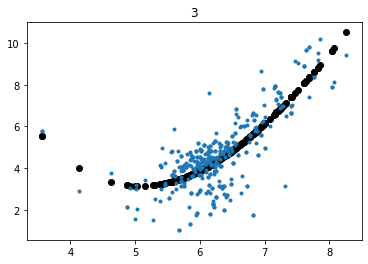

Normalized training error =  0.033762601546018615
Normalized testing error =  0.044921167015840445
Parameters
[ 4.29966267  1.25113825  0.35611711 -0.0324163  -0.00828807]


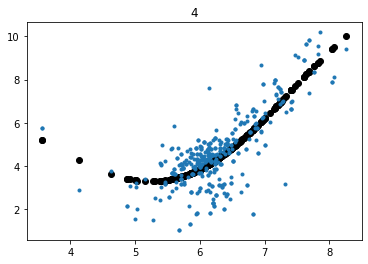

Normalized training error =  0.0336215382041309
Normalized testing error =  0.04518035908800643
5  - Fold
Parameters
[4.56814948]


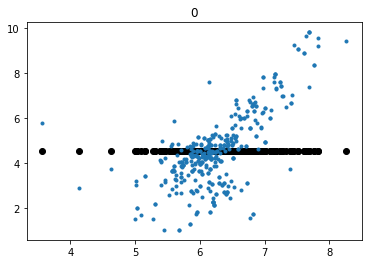

Normalized training error =  0.09827920155540042
Normalized testing error =  0.11130803465038015
Parameters
[4.56814948 1.154507  ]


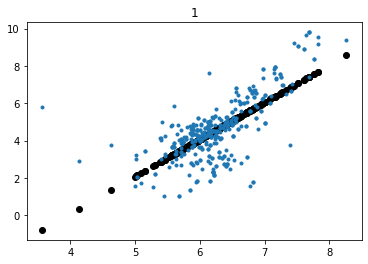

Normalized training error =  0.04971445493490173
Normalized testing error =  0.05198225282191661
Parameters
[4.29747797 1.11206758 0.27067151]


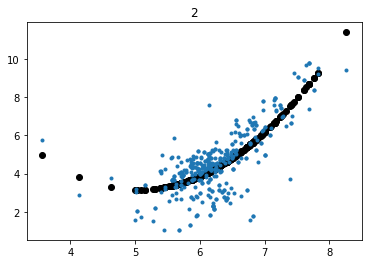

Normalized training error =  0.03971806936449296
Normalized testing error =  0.03731130272384638
Parameters
[ 4.30212740e+00  1.12973665e+00  2.66581876e-01 -3.57023087e-03]


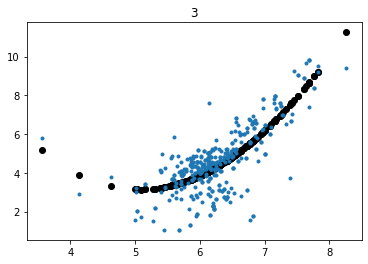

Normalized training error =  0.03970803077138611
Normalized testing error =  0.03689180975976113
Parameters
[ 4.29092381e+00  1.14181453e+00  2.90249184e-01 -8.61762785e-03
 -2.44733862e-03]


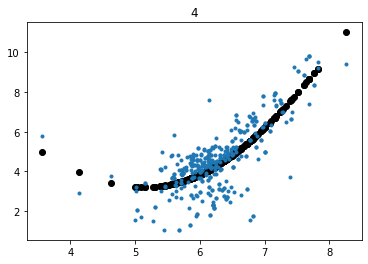

Normalized training error =  0.039687310014804404
Normalized testing error =  0.036615528301614894
Feature No: 1
1  - Fold
Parameters
[4.57675515]


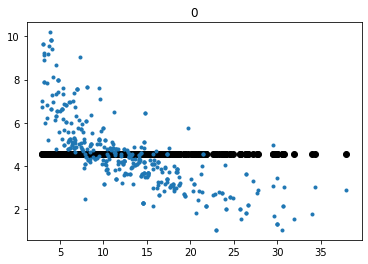

Normalized training error =  0.09167857605784512
Normalized testing error =  0.13523788913257284
Parameters
[ 4.57675515 -1.30677645]


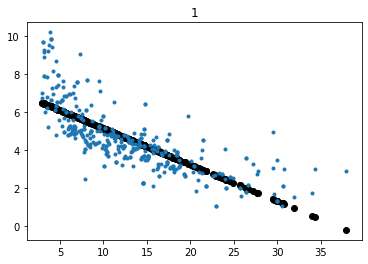

Normalized training error =  0.03738497259977121
Normalized testing error =  0.05651724085171595
Parameters
[ 4.19470792 -1.63516227  0.38204723]


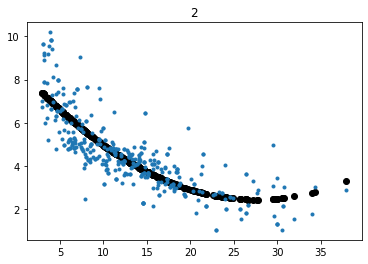

Normalized training error =  0.02928718364442027
Normalized testing error =  0.04099171142076308
Parameters
[ 4.07286984 -1.41931696  0.60426692 -0.11678492]


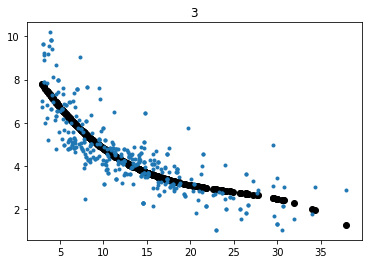

Normalized training error =  0.028063875545752133
Normalized testing error =  0.0408152394381635
Parameters
[ 4.09487164 -0.97812812  0.51734153 -0.40865703  0.09064877]


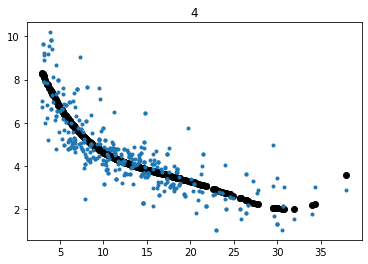

Normalized training error =  0.026505223914872346
Normalized testing error =  0.04070617708127771
2  - Fold
Parameters
[4.61031186]


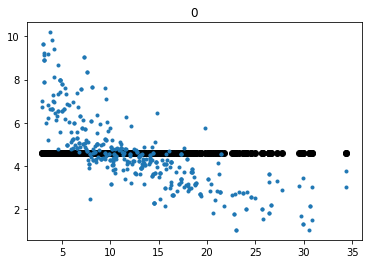

Normalized training error =  0.09267182404591212
Normalized testing error =  0.09372812437458398
Parameters
[ 4.61031186 -1.31957781]


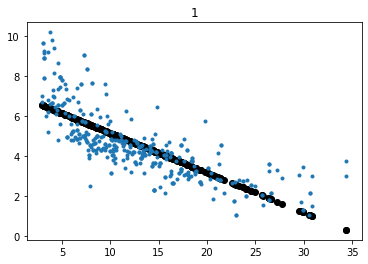

Normalized training error =  0.036640762230654614
Normalized testing error =  0.044620437917346774
Parameters
[ 4.22204289 -1.63655033  0.38826897]


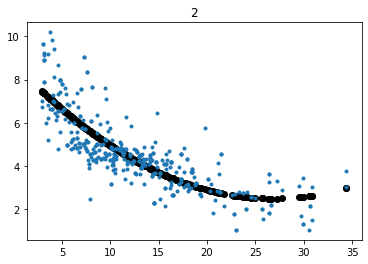

Normalized training error =  0.02875649456540895
Normalized testing error =  0.03225949431433366
Parameters
[ 4.1192948  -1.4324935   0.58055481 -0.10967744]


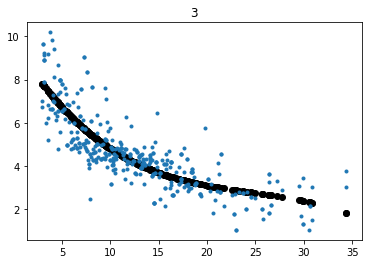

Normalized training error =  0.027837235579194236
Normalized testing error =  0.03090510984017012
Parameters
[ 4.181471   -1.01139648  0.40064391 -0.40187088  0.10823135]


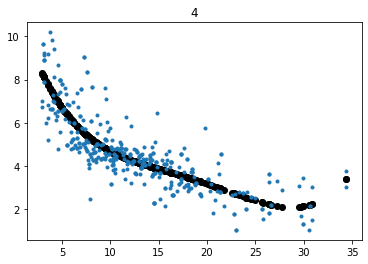

Normalized training error =  0.02634444593929481
Normalized testing error =  0.03408639754989268
3  - Fold
Parameters
[4.63071649]


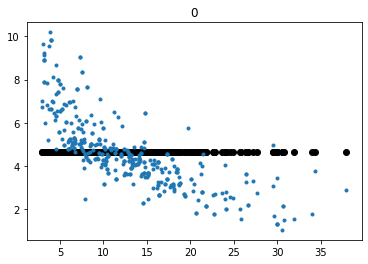

Normalized training error =  0.09224089720379952
Normalized testing error =  0.1013724257701077
Parameters
[ 4.63071649 -1.29950311]


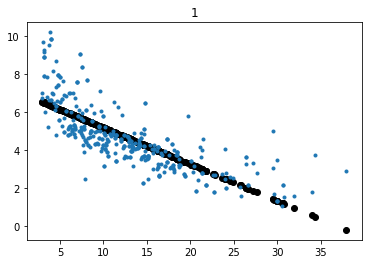

Normalized training error =  0.0375016828517837
Normalized testing error =  0.04296314141622927
Parameters
[ 4.26461217 -1.62536651  0.36610433]


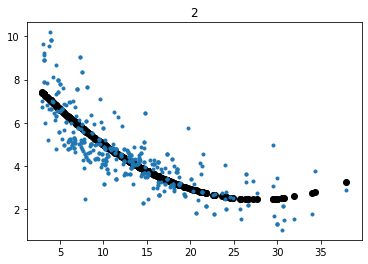

Normalized training error =  0.029553915860623867
Normalized testing error =  0.030616918197224948
Parameters
[ 4.14864768 -1.43975366  0.57293267 -0.10208465]


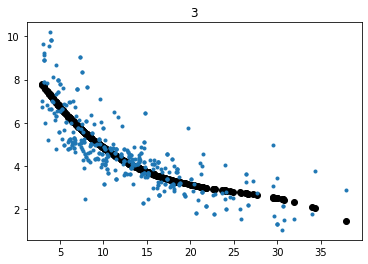

Normalized training error =  0.02852201774825705
Normalized testing error =  0.029418585444149416
Parameters
[ 4.16532892 -1.07473258  0.50546614 -0.3460322   0.07397855]


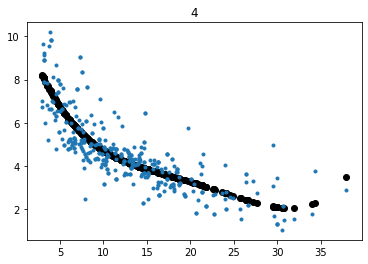

Normalized training error =  0.02732951642665914
Normalized testing error =  0.0273919102710914
4  - Fold
Parameters
[4.6095]


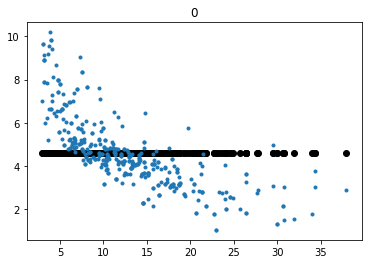

Normalized training error =  0.08995252213172565
Normalized testing error =  0.1059889871532327
Parameters
[ 4.6095     -1.26813149]


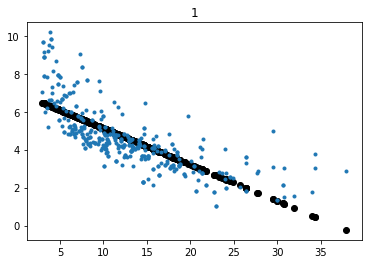

Normalized training error =  0.03822032412481498
Normalized testing error =  0.037222556262193944
Parameters
[ 4.20946423 -1.65991569  0.40003577]


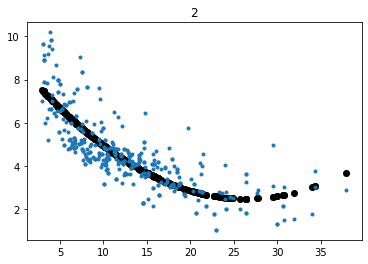

Normalized training error =  0.028042344887284066
Normalized testing error =  0.035756142431201315
Parameters
[ 4.08523687 -1.47461574  0.62524453 -0.10310822]


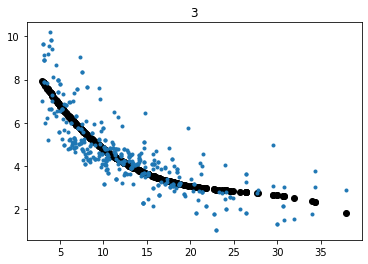

Normalized training error =  0.026794175659242376
Normalized testing error =  0.03589433841474794
Parameters
[ 4.1079173  -1.10071082  0.56315457 -0.34707145  0.07071148]


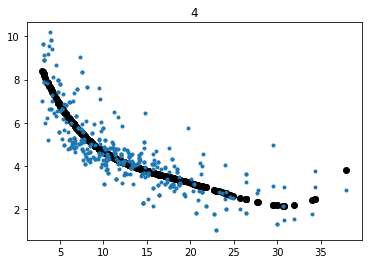

Normalized training error =  0.02559769869399416
Normalized testing error =  0.033746210374439214
5  - Fold
Parameters
[4.56814948]


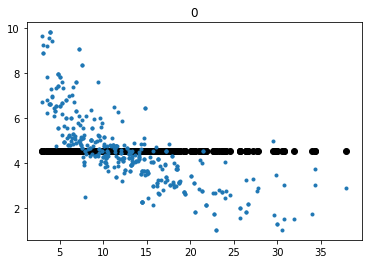

Normalized training error =  0.09827920155540042
Normalized testing error =  0.11130803465038015
Parameters
[ 4.56814948 -1.25852537]


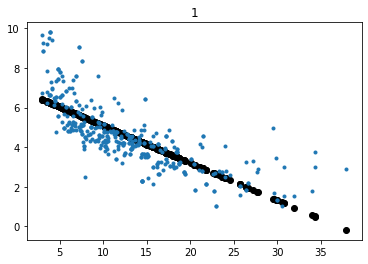

Normalized training error =  0.040569087309196374
Normalized testing error =  0.04466463070238291
Parameters
[ 4.20181484 -1.60933179  0.36633464]


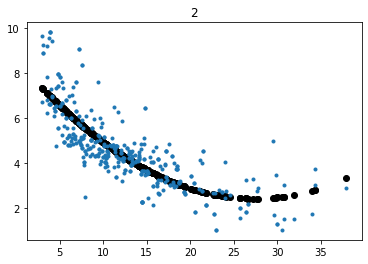

Normalized training error =  0.03130557159241865
Normalized testing error =  0.034571301529301726
Parameters
[ 4.1018884  -1.46450792  0.5458329  -0.08309401]


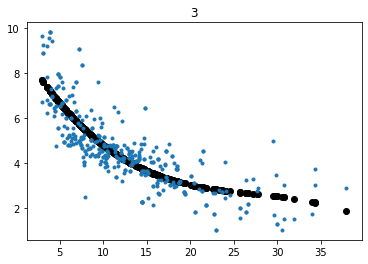

Normalized training error =  0.030466383781284998
Normalized testing error =  0.03242733079762762
Parameters
[ 4.1168962  -1.06876433  0.49272282 -0.34873655  0.07673726]


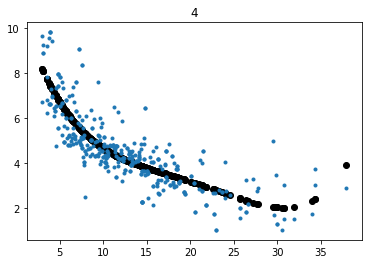

Normalized training error =  0.02902296509444601
Normalized testing error =  0.030778298134101264
Feature No: 2
1  - Fold
Parameters
[4.57675515]


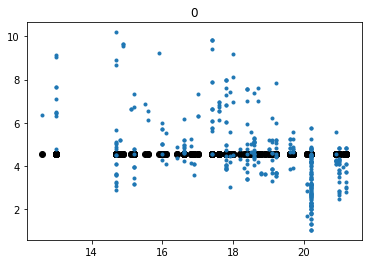

Normalized training error =  0.09167857605784512
Normalized testing error =  0.13523788913257284
Parameters
[ 4.57675515 -0.87623291]


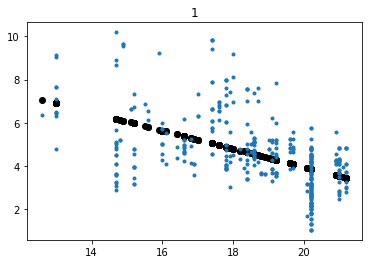

Normalized training error =  0.06726759724685726
Normalized testing error =  0.09397385088055568
Parameters
[ 4.81455187 -1.08044955 -0.23779671]


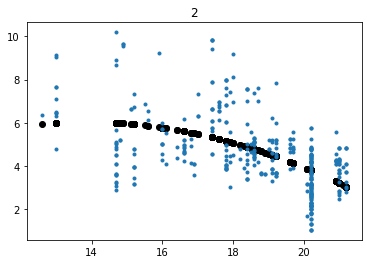

Normalized training error =  0.06520257252897503
Normalized testing error =  0.09177806760210165
Parameters
[ 4.86499237 -0.99869231 -0.33822921 -0.05821236]


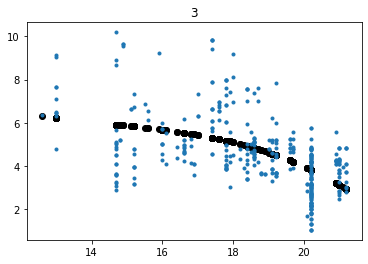

Normalized training error =  0.06505141465024537
Normalized testing error =  0.09018669557089848
Parameters
[ 5.03993136 -2.21654988 -0.76126687  0.94822719  0.38543753]


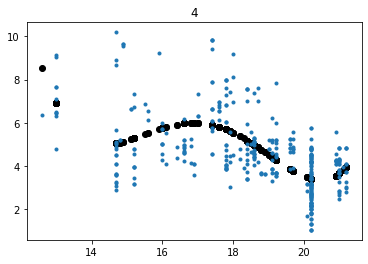

Normalized training error =  0.0571214031674829
Normalized testing error =  0.08470790102175427
Parameters
[ 5.26124805 -2.05730517 -1.79026154  0.7202538   0.93242539  0.18175828]


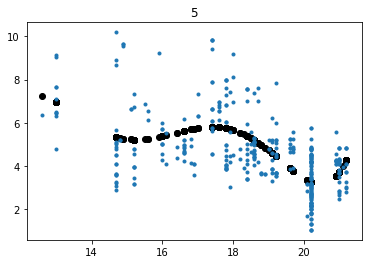

Normalized training error =  0.0558918263399042
Normalized testing error =  0.08166293107274455
Parameters
[ 5.2342215  -2.30607938 -1.6752902   1.23886799  0.93913014 -0.04593211
 -0.06285527]


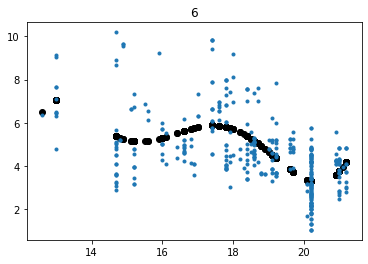

Normalized training error =  0.055764708215688324
Normalized testing error =  0.08086344514146684
2  - Fold
Parameters
[4.61031186]


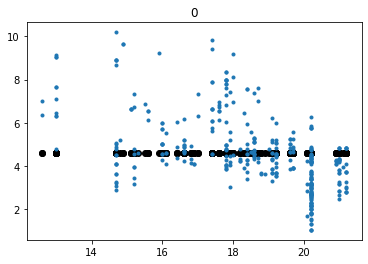

Normalized training error =  0.09267182404591212
Normalized testing error =  0.09372812437458398
Parameters
[ 4.61031186 -0.949626  ]


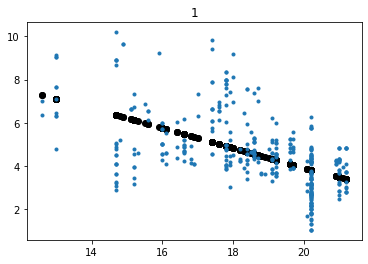

Normalized training error =  0.0636540538562796
Normalized testing error =  0.08573067122778931
Parameters
[ 4.80776798 -1.11882731 -0.19745612]


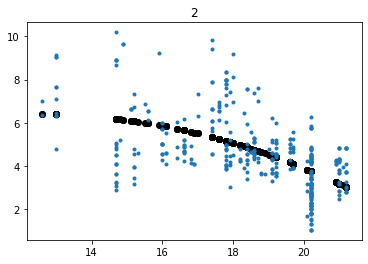

Normalized training error =  0.06216586727014302
Normalized testing error =  0.08173770734971882
Parameters
[ 4.86856331 -1.02308449 -0.31619855 -0.06762364]


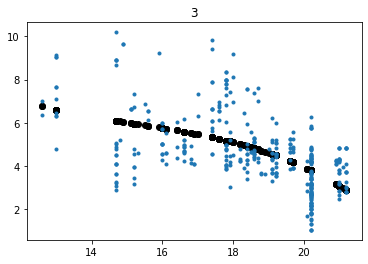

Normalized training error =  0.0619450284086009
Normalized testing error =  0.08073293572056103
Parameters
[ 5.04377551 -2.04148696 -0.72674471  0.76731678  0.32556201]


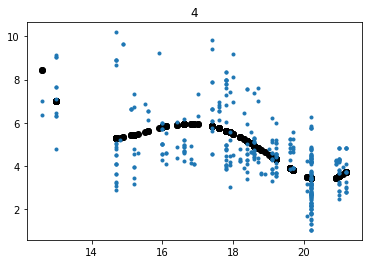

Normalized training error =  0.05600416842104104
Normalized testing error =  0.06724856991279983
Parameters
[ 5.30511967 -1.84038667 -1.90672791  0.47036103  0.94169401  0.20859094]


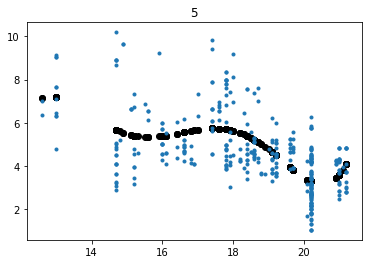

Normalized training error =  0.05415474027398317
Normalized testing error =  0.06843815755212256
Parameters
[ 5.27304844 -2.10290334 -1.7666142   0.99378341  0.93973308 -0.01501838
 -0.06037816]


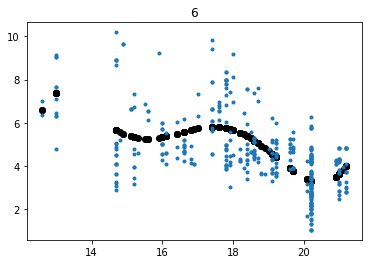

Normalized training error =  0.054002800049607814
Normalized testing error =  0.06791329025617548
3  - Fold
Parameters
[4.63071649]


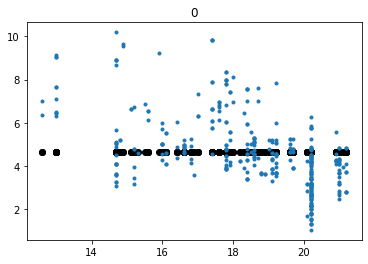

Normalized training error =  0.09224089720379952
Normalized testing error =  0.1013724257701077
Parameters
[ 4.63071649 -0.93273615]


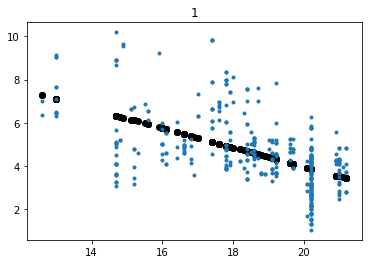

Normalized training error =  0.06404009045129529
Normalized testing error =  0.08808721787375409
Parameters
[ 4.83519514 -1.11622357 -0.20447865]


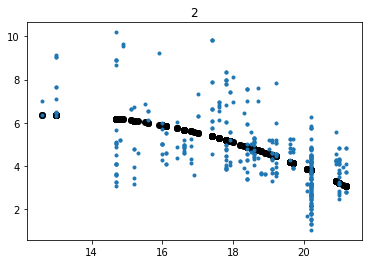

Normalized training error =  0.06247659088898645
Normalized testing error =  0.08436823556967231
Parameters
[ 4.92968575 -0.97336437 -0.39382396 -0.10570622]


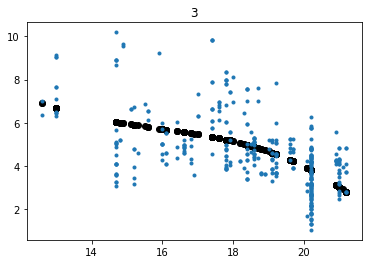

Normalized training error =  0.061961943525872726
Normalized testing error =  0.08463062868264697
Parameters
[ 5.08724479 -2.04829891 -0.74866523  0.79577494  0.34007341]


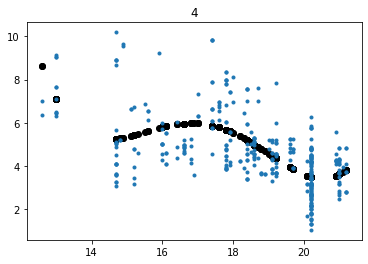

Normalized training error =  0.0557479449877536
Normalized testing error =  0.07185134338414548
Parameters
[ 5.31011753 -1.89143788 -1.78234331  0.57274478  0.89442247  0.18323331]


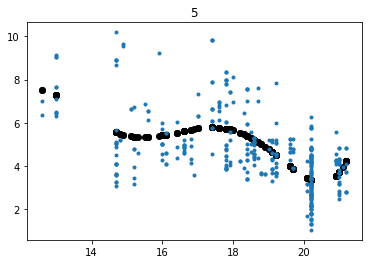

Normalized training error =  0.05433301541883588
Normalized testing error =  0.0705392097126936
Parameters
[ 5.25412493 -2.37669048 -1.52141891  1.54095064  0.87900904 -0.23788017
 -0.1128354 ]


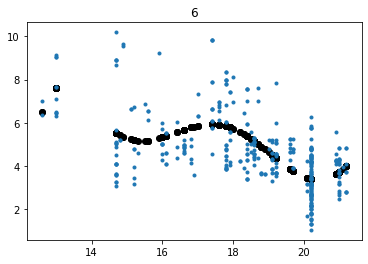

Normalized training error =  0.05382143438755854
Normalized testing error =  0.07198201067132155
4  - Fold
Parameters
[4.6095]


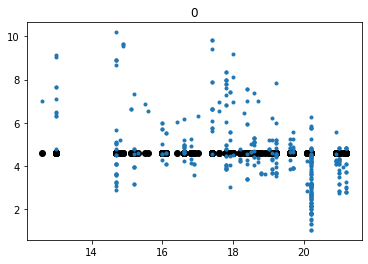

Normalized training error =  0.08995252213172565
Normalized testing error =  0.1059889871532327
Parameters
[ 4.6095     -0.82197019]


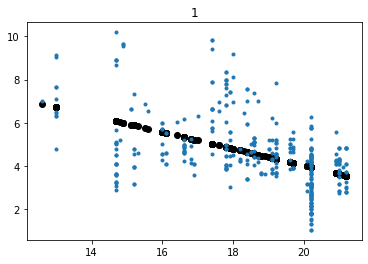

Normalized training error =  0.06821828047617721
Normalized testing error =  0.06506336435079935
Parameters
[ 4.82780228 -0.99941145 -0.21830228]


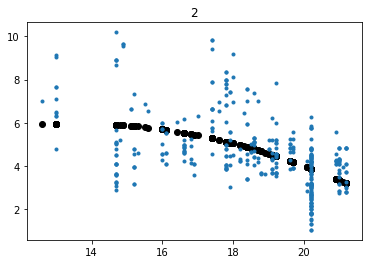

Normalized training error =  0.06659006323406003
Normalized testing error =  0.06156129982851334
Parameters
[ 4.91541856 -0.84608358 -0.39442808 -0.10889141]


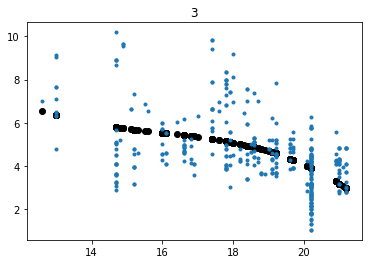

Normalized training error =  0.06609862352143488
Normalized testing error =  0.06184824846078975
Parameters
[ 5.11850714 -1.9700941  -0.87171854  0.8200723   0.3780278 ]


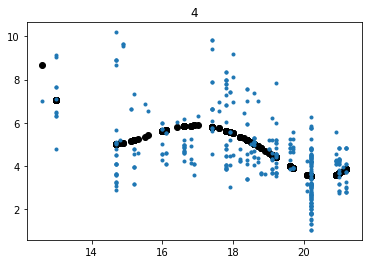

Normalized training error =  0.05909938989091911
Normalized testing error =  0.05306432379362461
Parameters
[ 5.37741102 -1.74422152 -2.06916051  0.49447357  1.01274295  0.22224697]


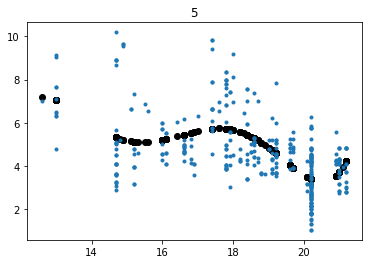

Normalized training error =  0.057479733628702526
Normalized testing error =  0.05278249730513331
Parameters
[ 5.35259869 -2.04449205 -1.97031129  1.12682935  1.05252354 -0.05320387
 -0.08030953]


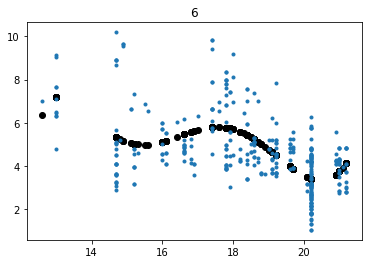

Normalized training error =  0.0573109277108417
Normalized testing error =  0.05247062398802048
5  - Fold
Parameters
[4.56814948]


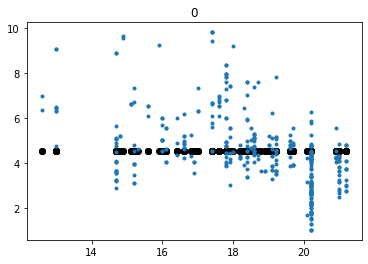

Normalized training error =  0.09827920155540042
Normalized testing error =  0.11130803465038015
Parameters
[ 4.56814948 -0.81018257]


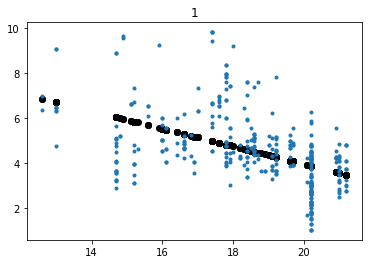

Normalized training error =  0.07436291344655847
Normalized testing error =  0.07082430999269178
Parameters
[ 4.86512105 -1.04677082 -0.29697156]


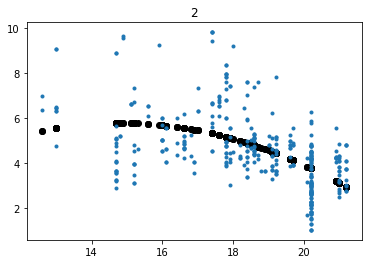

Normalized training error =  0.07057012101679055
Normalized testing error =  0.07612474898441336
Parameters
[ 4.94500771 -0.91045795 -0.4499203  -0.09170936]


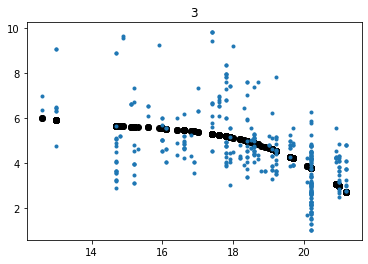

Normalized training error =  0.07009683013023414
Normalized testing error =  0.07588429304142066
Parameters
[ 5.14086179 -2.10401614 -0.9316219   0.85145106  0.36846618]


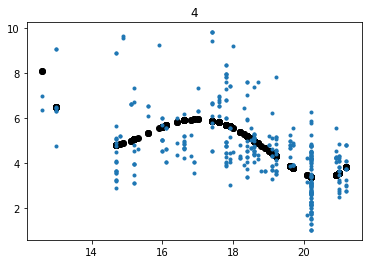

Normalized training error =  0.06063479956297341
Normalized testing error =  0.07398157154778805
Parameters
[ 5.30797001 -1.94965371 -1.69016492  0.64150091  0.75233394  0.13107903]


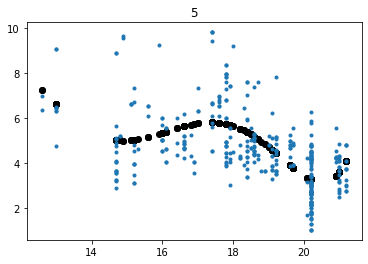

Normalized training error =  0.059688199431144895
Normalized testing error =  0.07043913379982415
Parameters
[ 5.27946025 -2.22898874 -1.57894669  1.17678512  0.77232072 -0.08644536
 -0.05990007]


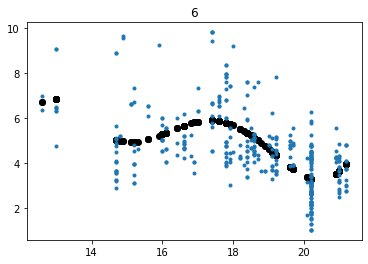

Normalized training error =  0.05949848475349154
Normalized testing error =  0.06990792373872112


In [12]:
for k in range(0,3): #Feature
    print("Feature No:",k)
    for f in range(1,6):
        print(f," - Fold")
        if(k==2):
            x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug=fold(k,f,df)
            Poly_Reg_Mat_inv(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug,6)
        else:   
            x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug=fold(k,f,df)
            Poly_Reg_Mat_inv(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug,4)

Feature No: 0
1  - Fold
Parameters
[4.57675515]


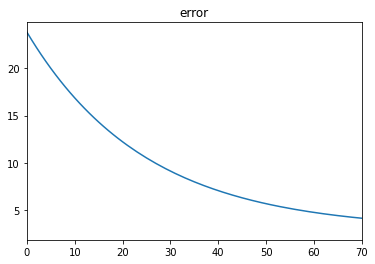

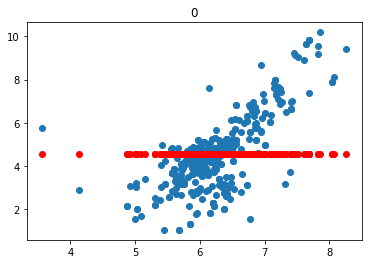

Normalized training error =  0.09167857605784512
Normalized testing error =  0.13523788922295069
Parameters
[4.57675515 1.25268071]


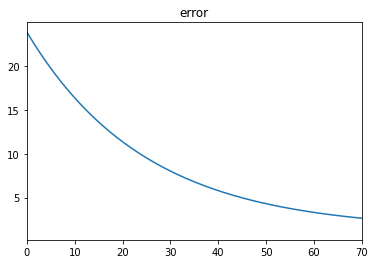

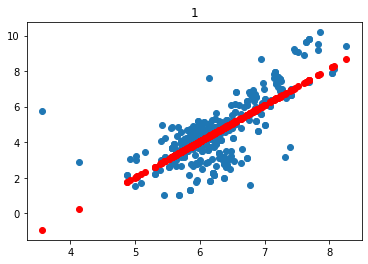

Normalized training error =  0.041787043354042964
Normalized testing error =  0.09285783866506492
Parameters
[4.31848255 1.17416859 0.25827086]


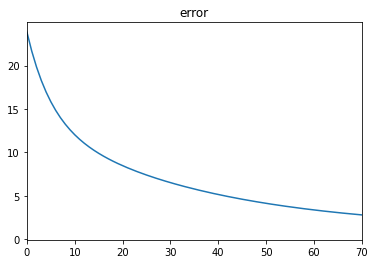

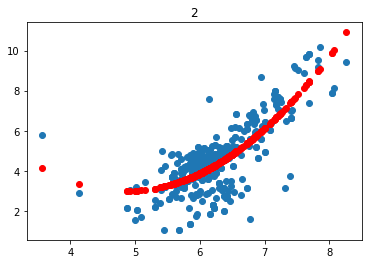

Normalized training error =  0.03464263927987
Normalized testing error =  0.0588055854505514
Parameters
[ 4.34119305  1.27100538  0.24171013 -0.02064959]


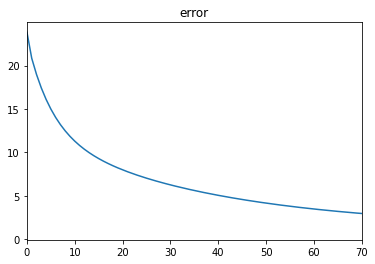

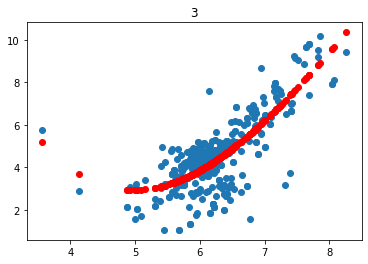

Normalized training error =  0.034396030647012174
Normalized testing error =  0.05839477447605911
2  - Fold
Parameters
[4.61031185]


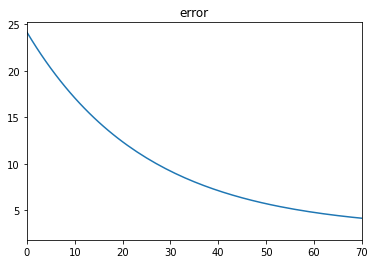

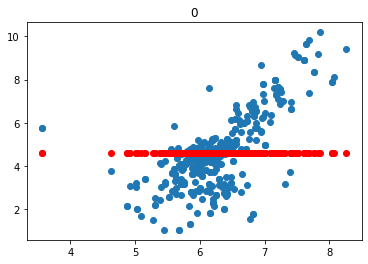

Normalized training error =  0.09267182404591212
Normalized testing error =  0.09372812434301808
Parameters
[4.61031185 1.19237868]


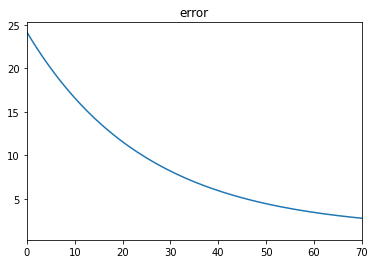

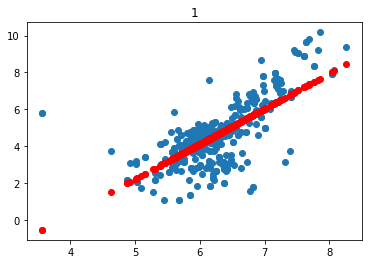

Normalized training error =  0.04692222966888748
Normalized testing error =  0.0423658699171676
Parameters
[4.32149603 1.15201516 0.28881501]


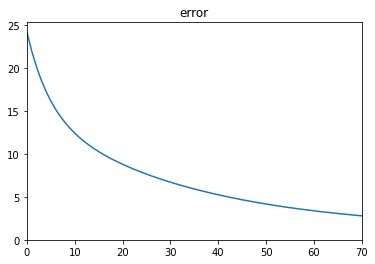

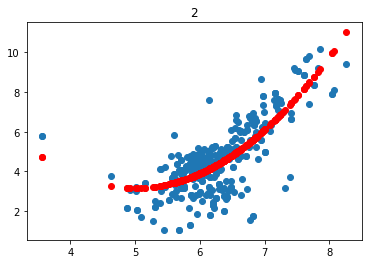

Normalized training error =  0.036616320878693154
Normalized testing error =  0.03295308370517235
Parameters
[ 4.35855393  1.28649647  0.2553769  -0.02677625]


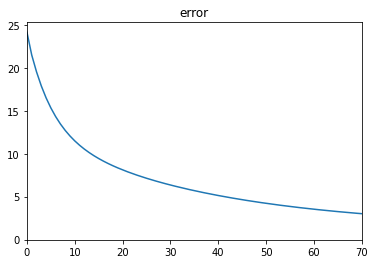

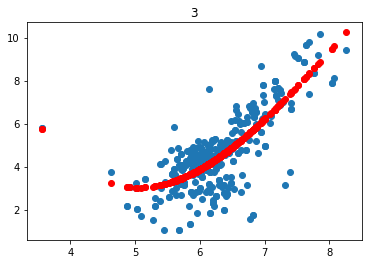

Normalized training error =  0.03613409206672917
Normalized testing error =  0.034229894128432886
3  - Fold
Parameters
[4.63071649]


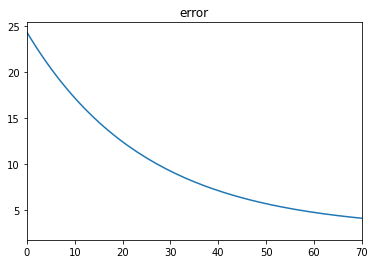

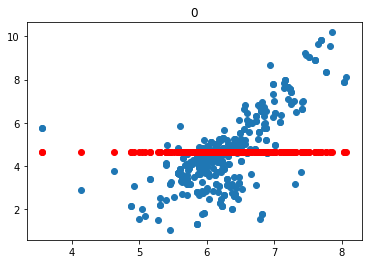

Normalized training error =  0.09224089720379952
Normalized testing error =  0.10137242567850326
Parameters
[4.63071649 1.18772943]


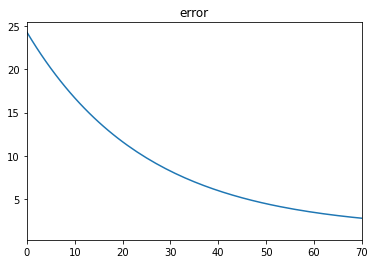

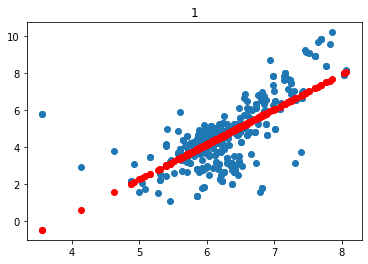

Normalized training error =  0.04651324018649522
Normalized testing error =  0.04707534701373255
Parameters
[4.32557395 1.18281518 0.30514178]


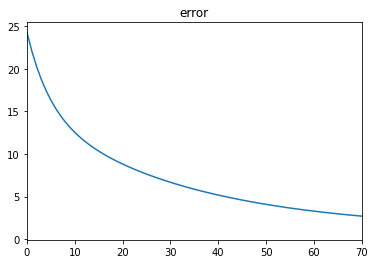

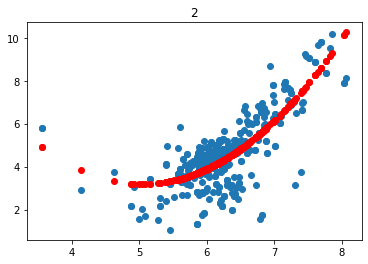

Normalized training error =  0.03499029576515342
Normalized testing error =  0.04253247660659607
Parameters
[ 4.35014754  1.26078287  0.28063129 -0.01619612]


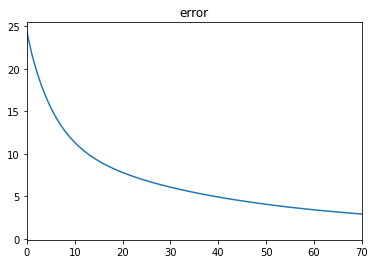

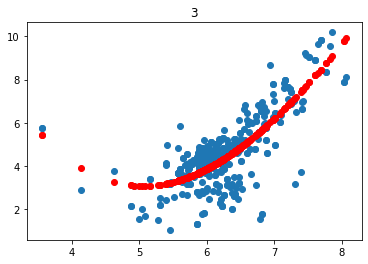

Normalized training error =  0.03483626465812804
Normalized testing error =  0.04206094080250008
4  - Fold
Parameters
[4.60949999]


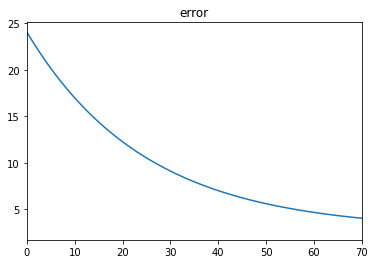

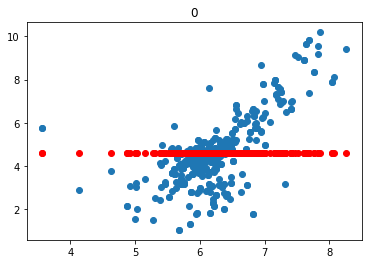

Normalized training error =  0.08995252213172565
Normalized testing error =  0.1059889871239187
Parameters
[4.60949999 1.17410415]


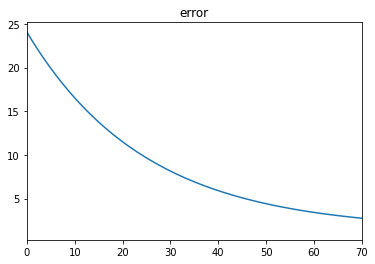

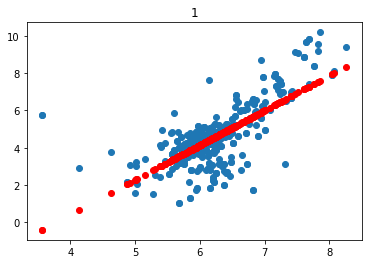

Normalized training error =  0.045607425515032864
Normalized testing error =  0.04871568701774005
Parameters
[4.30830511 1.13080239 0.30119421]


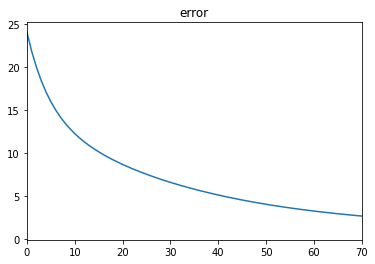

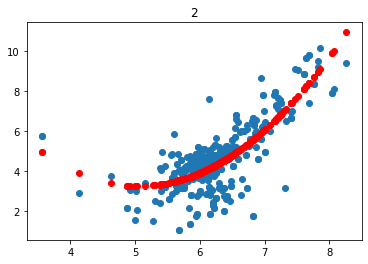

Normalized training error =  0.03393163038626983
Normalized testing error =  0.04536254255937863
Parameters
[ 4.33108274  1.21584248  0.28059372 -0.01644499]


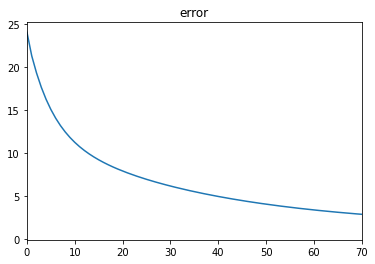

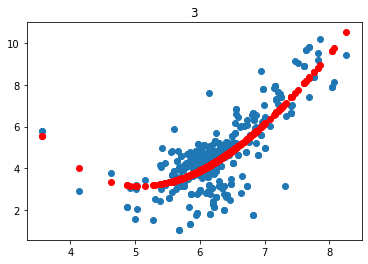

Normalized training error =  0.03376262781290355
Normalized testing error =  0.044930603415724295
5  - Fold
Parameters
[4.56814948]


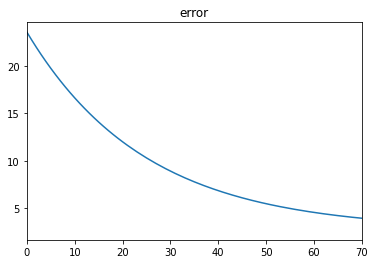

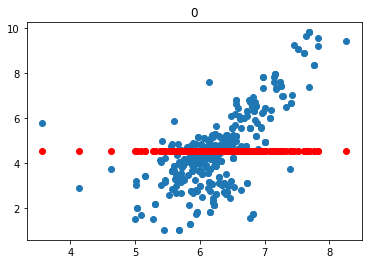

Normalized training error =  0.09827920155540042
Normalized testing error =  0.11130803473009997
Parameters
[4.56814948 1.154507  ]


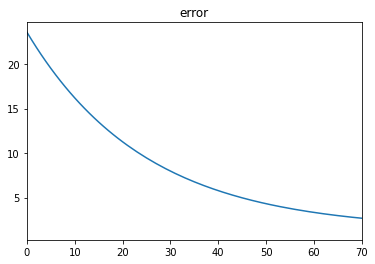

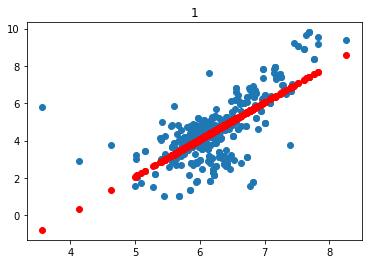

Normalized training error =  0.04971445493490173
Normalized testing error =  0.05198225286468203
Parameters
[4.29747676 1.11206739 0.27067182]


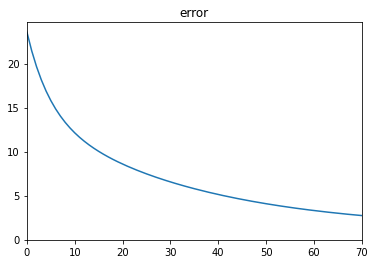

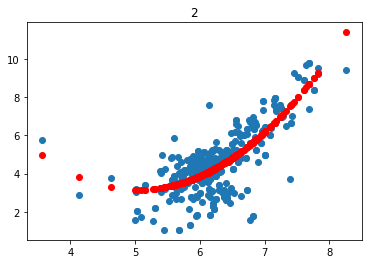

Normalized training error =  0.03971806936453642
Normalized testing error =  0.03731130697915516
Parameters
[ 4.30192853e+00  1.12925231e+00  2.66688109e-01 -3.51497586e-03]


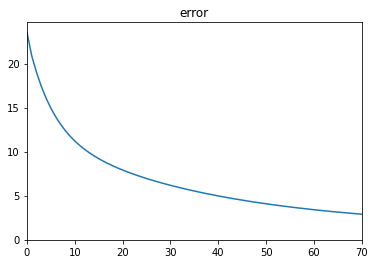

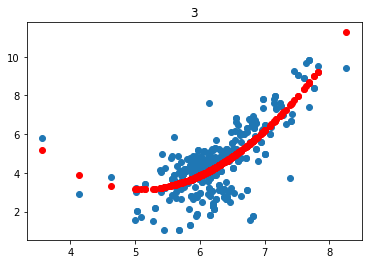

Normalized training error =  0.039708035202938974
Normalized testing error =  0.03689652013978289
Feature No: 1
1  - Fold
Parameters
[4.57675515]


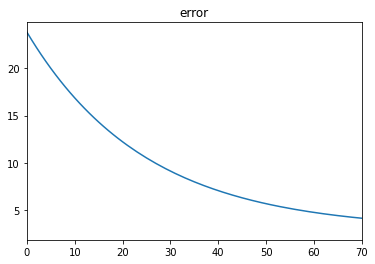

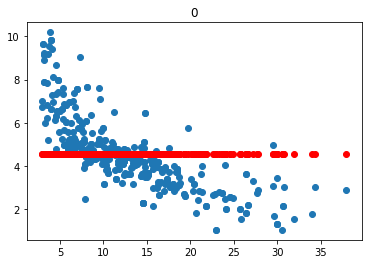

Normalized training error =  0.09167857605784512
Normalized testing error =  0.13523788922295069
Parameters
[ 4.57675515 -1.30677645]


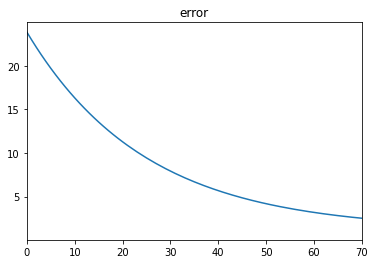

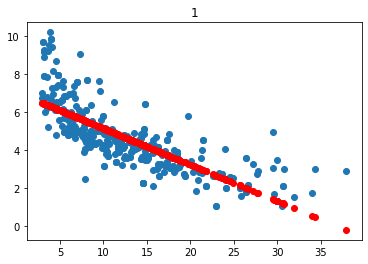

Normalized training error =  0.037384972599771214
Normalized testing error =  0.056517240822028955
Parameters
[ 4.19448907 -1.63535038  0.38217187]


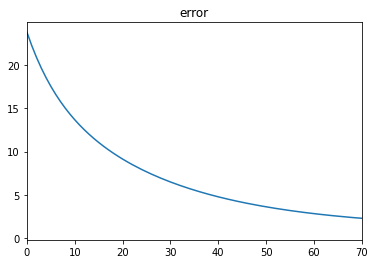

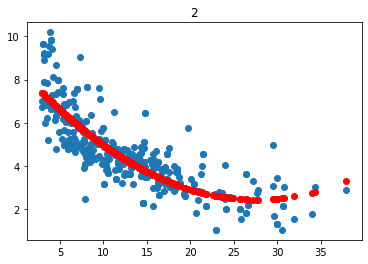

Normalized training error =  0.02928718499697494
Normalized testing error =  0.04098988365605986
Parameters
[ 4.06551669 -1.41120511  0.61309641 -0.1207043 ]


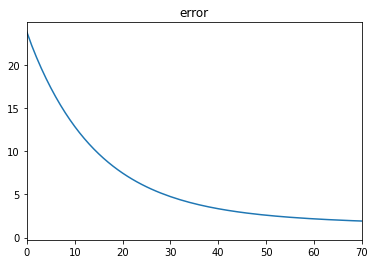

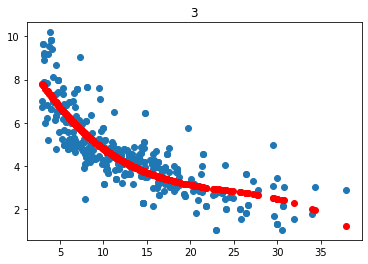

Normalized training error =  0.028065604851839034
Normalized testing error =  0.040855068291534194
2  - Fold
Parameters
[4.61031185]


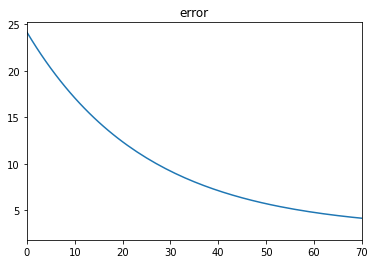

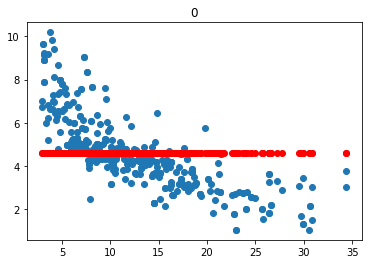

Normalized training error =  0.09267182404591212
Normalized testing error =  0.09372812434301808
Parameters
[ 4.61031185 -1.31957781]


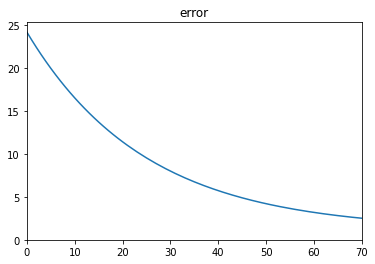

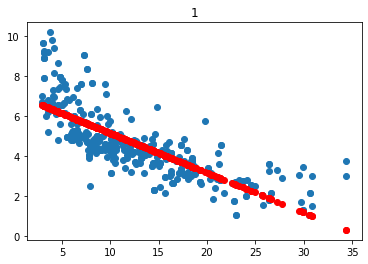

Normalized training error =  0.03664076223065461
Normalized testing error =  0.0446204378957129
Parameters
[ 4.2217532  -1.63678681  0.38843705]


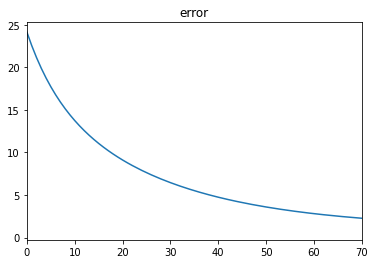

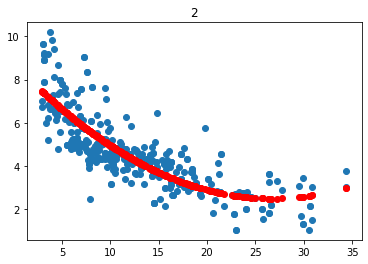

Normalized training error =  0.02875649683585188
Normalized testing error =  0.032260997556570546
Parameters
[ 4.10982451 -1.42000458  0.59255426 -0.11555916]


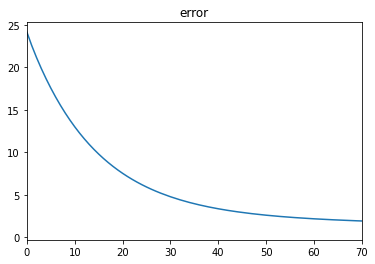

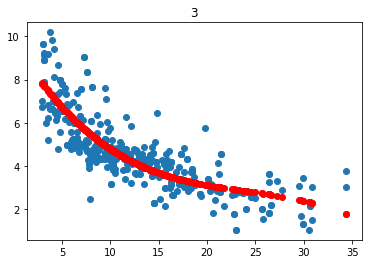

Normalized training error =  0.027840469458258927
Normalized testing error =  0.03098909589413673
3  - Fold
Parameters
[4.63071649]


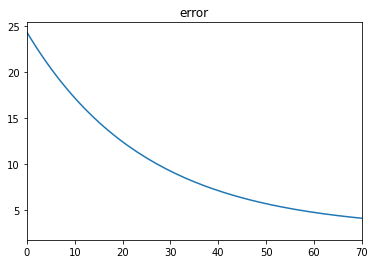

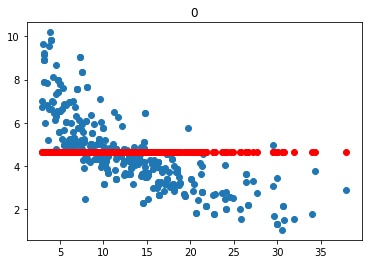

Normalized training error =  0.09224089720379952
Normalized testing error =  0.10137242567850326
Parameters
[ 4.63071649 -1.29950311]


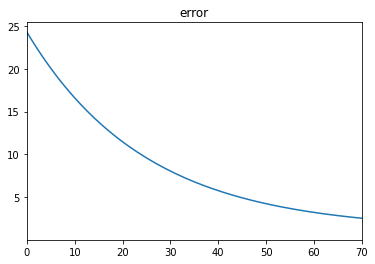

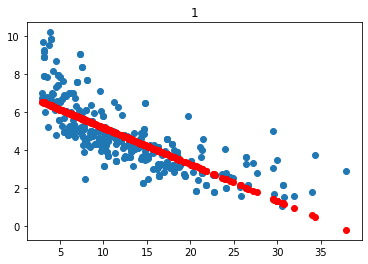

Normalized training error =  0.0375016828517837
Normalized testing error =  0.04296314131540801
Parameters
[ 4.2644221  -1.62553567  0.3662113 ]


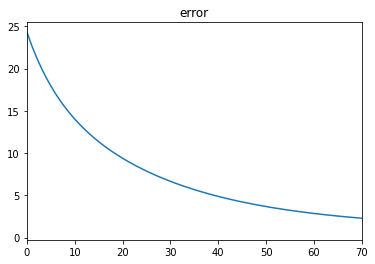

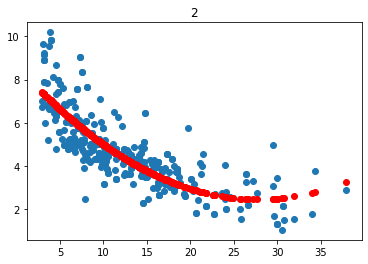

Normalized training error =  0.02955391694021288
Normalized testing error =  0.0306146185203401
Parameters
[ 4.14102685 -1.43242149  0.5818676  -0.1057867 ]


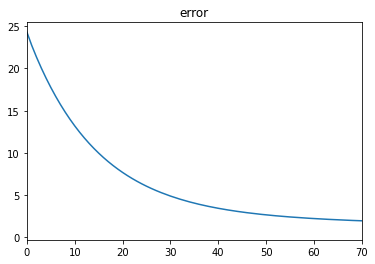

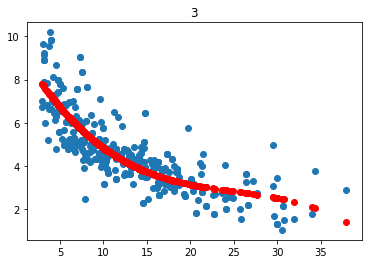

Normalized training error =  0.028523738322937406
Normalized testing error =  0.029380722862439528
4  - Fold
Parameters
[4.60949999]


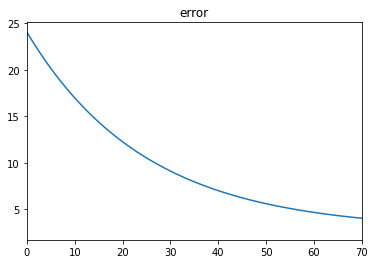

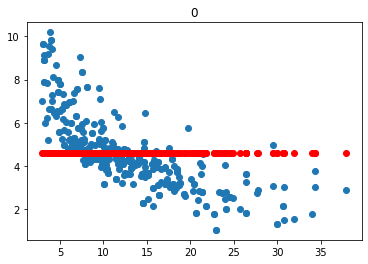

Normalized training error =  0.08995252213172565
Normalized testing error =  0.1059889871239187
Parameters
[ 4.60949999 -1.26813148]


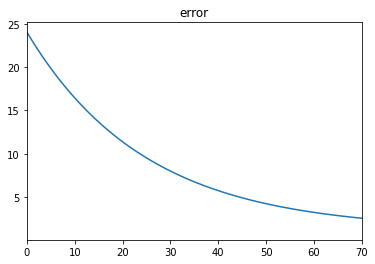

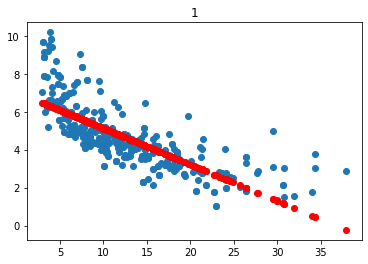

Normalized training error =  0.03822032412481497
Normalized testing error =  0.03722255628877065
Parameters
[ 4.2093128  -1.66006399  0.40012061]


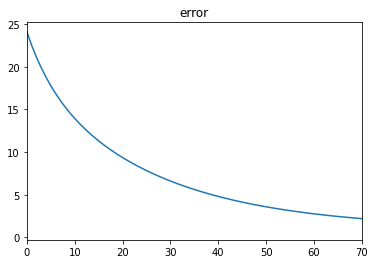

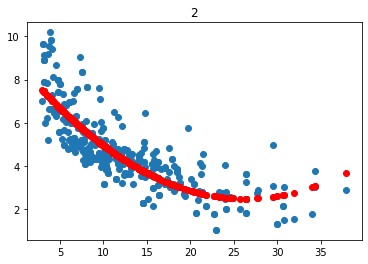

Normalized training error =  0.028042345624589023
Normalized testing error =  0.035758266372647264
Parameters
[ 4.08030741 -1.47057304  0.63086834 -0.10524678]


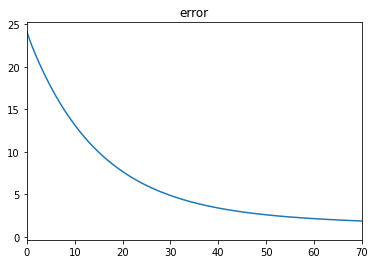

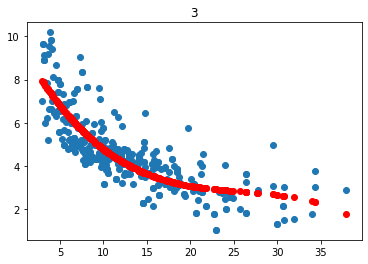

Normalized training error =  0.026794874660088123
Normalized testing error =  0.035939899012041567
5  - Fold
Parameters
[4.56814948]


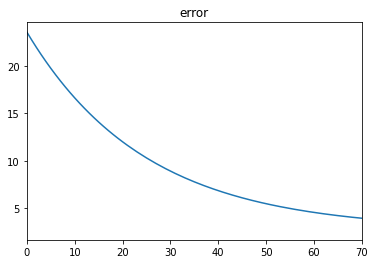

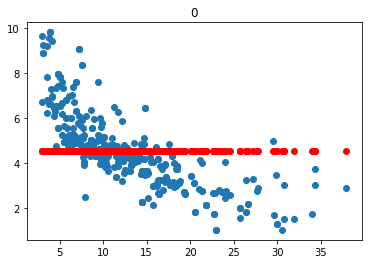

Normalized training error =  0.09827920155540042
Normalized testing error =  0.11130803473009997
Parameters
[ 4.56814948 -1.25852536]


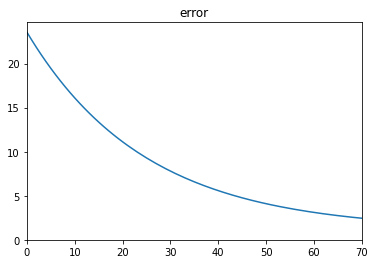

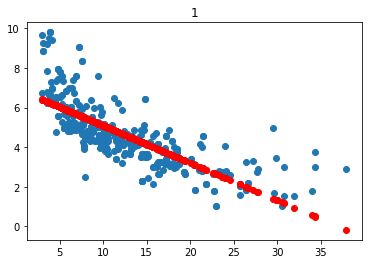

Normalized training error =  0.04056908730919638
Normalized testing error =  0.044664630805685786
Parameters
[ 4.2016306  -1.60950822  0.36643917]


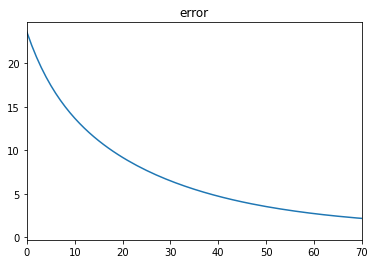

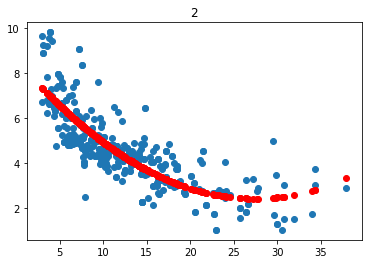

Normalized training error =  0.03130557279045605
Normalized testing error =  0.03457128017509585
Parameters
[ 4.09511321 -1.45915561  0.55365781 -0.08609141]


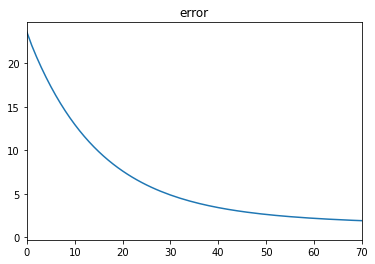

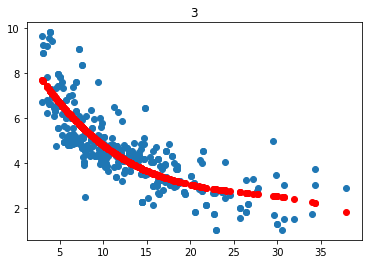

Normalized training error =  0.030467795881036677
Normalized testing error =  0.032394983157848875
Feature No: 2
1  - Fold
Parameters
[4.57675515]


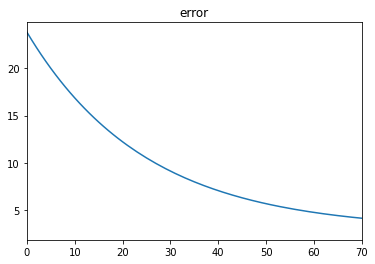

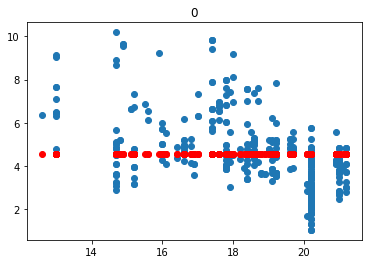

Normalized training error =  0.09167857605784512
Normalized testing error =  0.13523788922295069
Parameters
[ 4.57675515 -0.87623291]


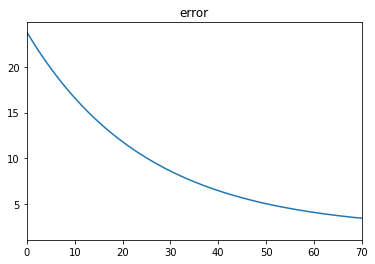

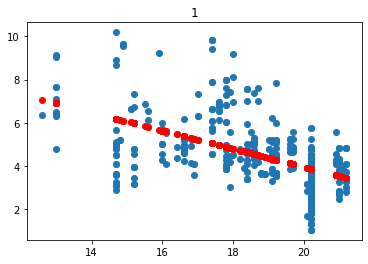

Normalized training error =  0.06726759724685724
Normalized testing error =  0.09397385091262296
Parameters
[ 4.81037496 -1.07686248 -0.234966  ]


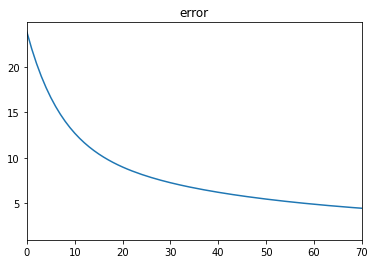

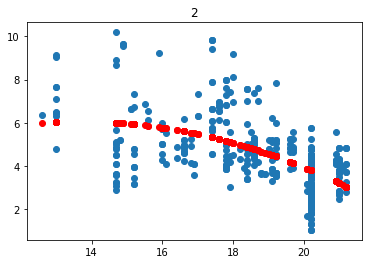

Normalized training error =  0.06520296526254521
Normalized testing error =  0.09176994878037663
Parameters
[ 4.83252893 -1.02205928 -0.29495162 -0.03854088]


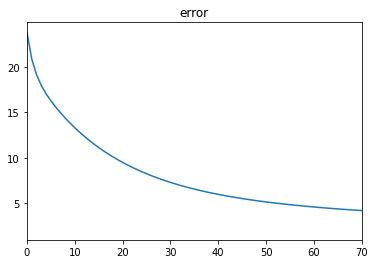

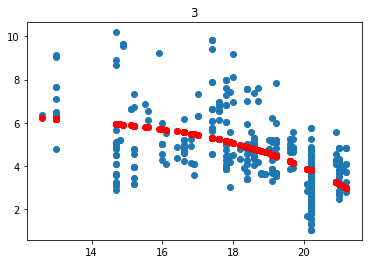

Normalized training error =  0.06507348528364107
Normalized testing error =  0.0906304986548628
Parameters
[ 4.93571849 -1.6794716  -0.60780684  0.57880829  0.25404606]


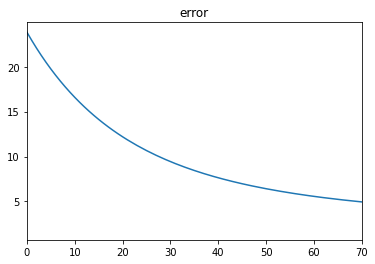

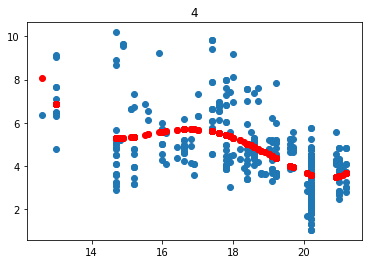

Normalized training error =  0.058234044178164426
Normalized testing error =  0.08305012044176587
2  - Fold
Parameters
[4.61031185]


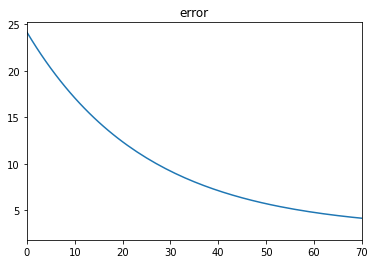

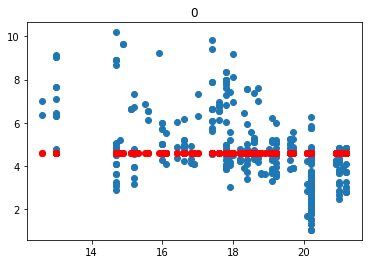

Normalized training error =  0.09267182404591212
Normalized testing error =  0.09372812434301808
Parameters
[ 4.61031185 -0.949626  ]


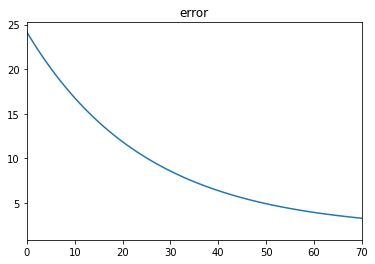

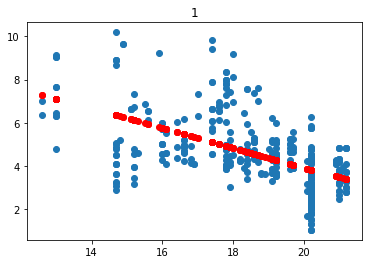

Normalized training error =  0.06365405385627962
Normalized testing error =  0.08573067114811977
Parameters
[ 4.80420065 -1.11577045 -0.19506748]


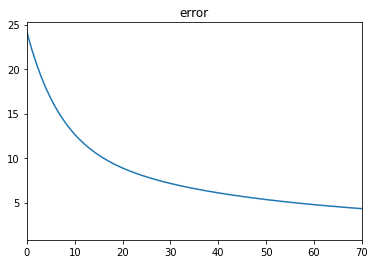

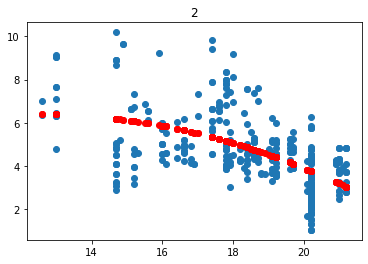

Normalized training error =  0.0621661625810912
Normalized testing error =  0.08173635064638443
Parameters
[ 4.83853088 -1.04411385 -0.27692482 -0.05010763]


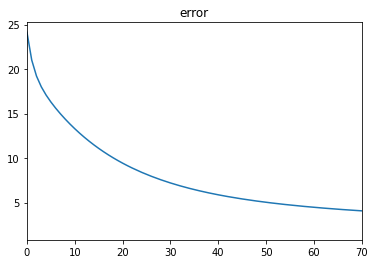

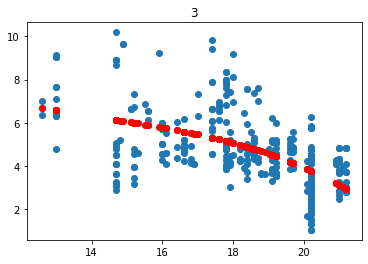

Normalized training error =  0.06196408485735906
Normalized testing error =  0.08112871713630988
Parameters
[-2.72070697e+41  5.34998128e+41 -1.34900611e+42  3.23129741e+42
 -8.30560911e+42]


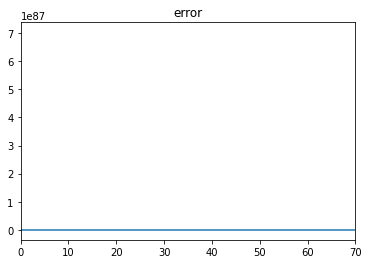

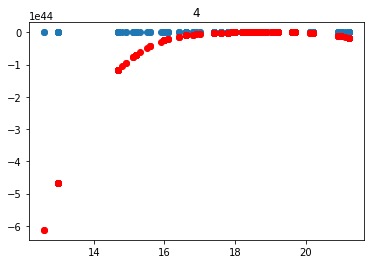

Normalized training error =  2.764784718391338e+86
Normalized testing error =  2.1841883160508216e+86
3  - Fold
Parameters
[4.63071649]


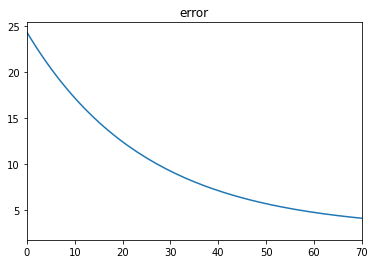

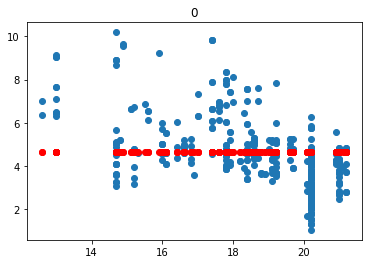

Normalized training error =  0.09224089720379952
Normalized testing error =  0.10137242567850326
Parameters
[ 4.63071649 -0.93273615]


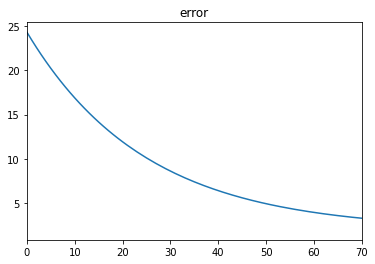

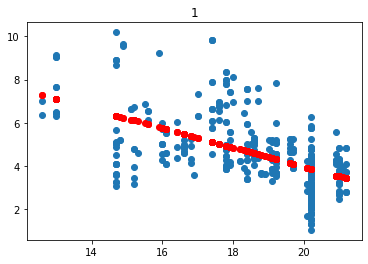

Normalized training error =  0.06404009045129529
Normalized testing error =  0.08808721773921818
Parameters
[ 4.83062341 -1.11212117 -0.20135499]


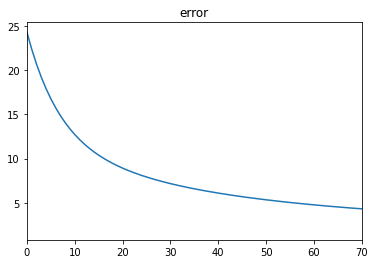

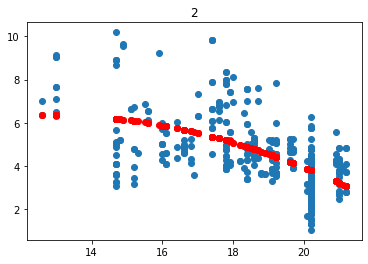

Normalized training error =  0.06247707845407625
Normalized testing error =  0.08434778995760572
Parameters
[ 4.89247085 -0.99699279 -0.34382614 -0.08382507]


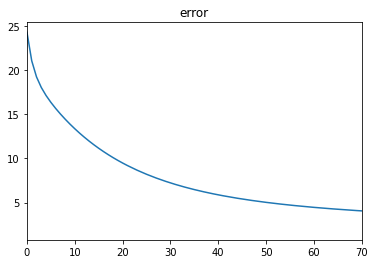

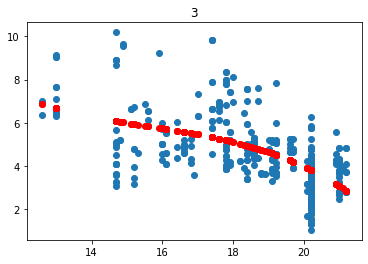

Normalized training error =  0.06199033789450961
Normalized testing error =  0.08456323366452387
Parameters
[-1.51958760e+56  3.02891325e+56 -7.56579050e+56  1.81610377e+57
 -4.64769590e+57]


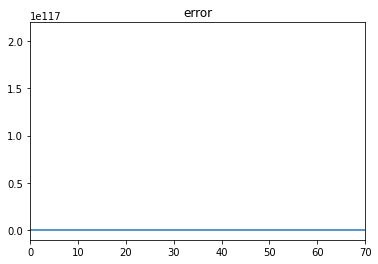

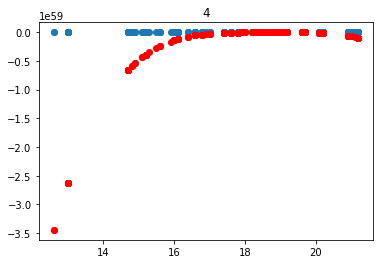

Normalized training error =  8.890983692620871e+115
Normalized testing error =  6.674785191142207e+115
4  - Fold
Parameters
[4.60949999]


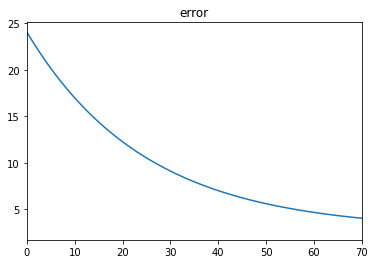

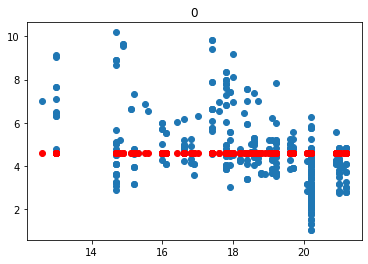

Normalized training error =  0.08995252213172565
Normalized testing error =  0.1059889871239187
Parameters
[ 4.60949999 -0.82197019]


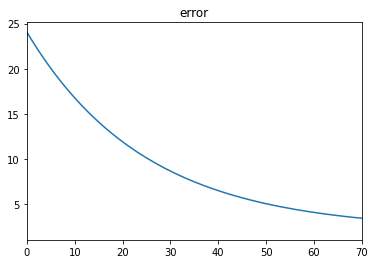

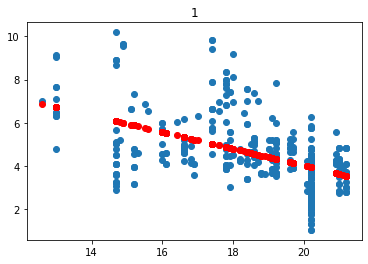

Normalized training error =  0.06821828047617721
Normalized testing error =  0.06506336437146276
Parameters
[ 4.8225461  -0.99513911 -0.21468253]


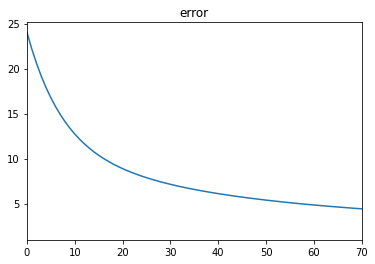

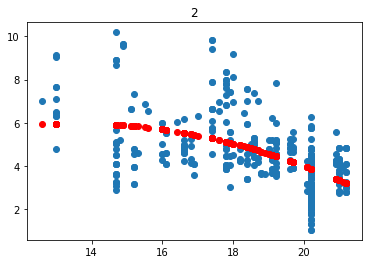

Normalized training error =  0.06659065395821881
Normalized testing error =  0.06161531142566502
Parameters
[ 4.88014591 -0.87269879 -0.3476573  -0.08669348]


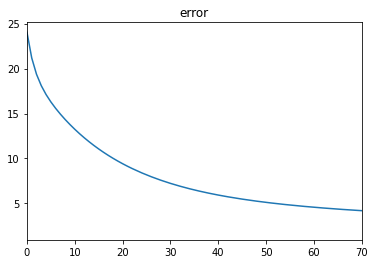

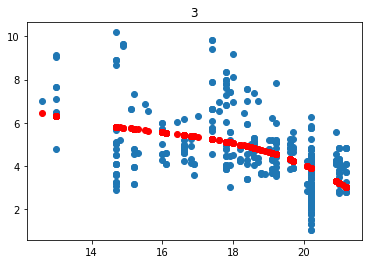

Normalized training error =  0.06612502375358262
Normalized testing error =  0.06166308598563805
Parameters
[ 4.98598077 -1.4424101  -0.67172489  0.45850732  0.23988657]


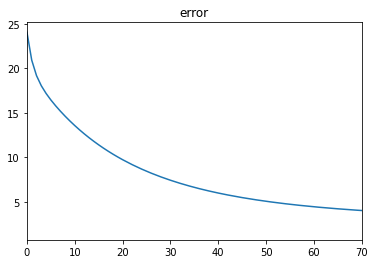

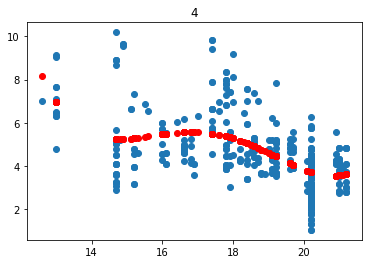

Normalized training error =  0.060231422839850966
Normalized testing error =  0.05629511086828414
5  - Fold
Parameters
[4.56814948]


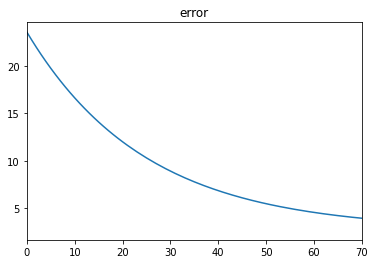

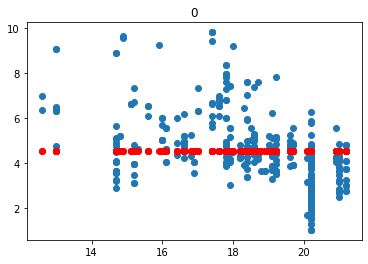

Normalized training error =  0.09827920155540042
Normalized testing error =  0.11130803473009997
Parameters
[ 4.56814948 -0.81018257]


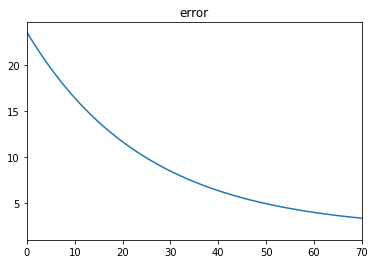

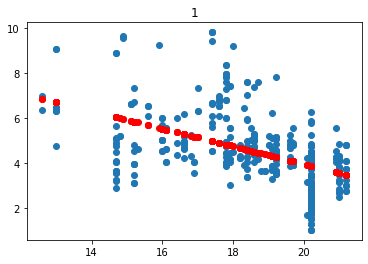

Normalized training error =  0.07436291344655847
Normalized testing error =  0.07082431013153806
Parameters
[ 4.86199958 -1.04428404 -0.29491022]


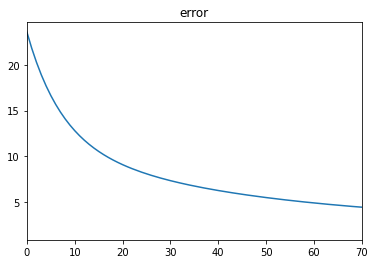

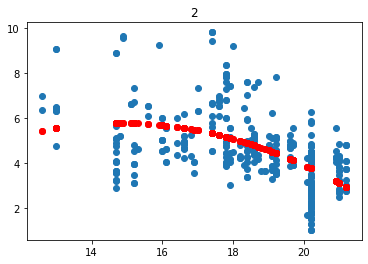

Normalized training error =  0.07057037069365435
Normalized testing error =  0.0760988767991625
Parameters
[ 4.91843757 -0.93143912 -0.41619947 -0.07604094]


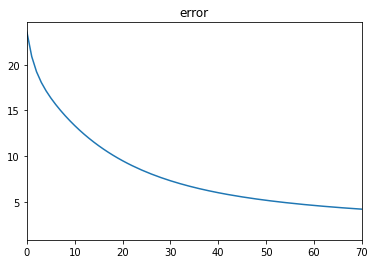

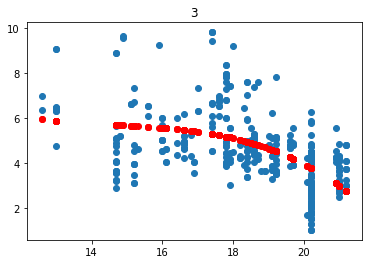

Normalized training error =  0.07011466762372381
Normalized testing error =  0.07565398171700426
Parameters
[ 5.03857787 -1.62398377 -0.77275147  0.53683756  0.25490617]


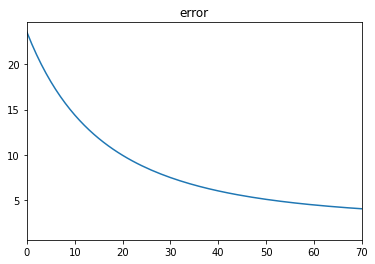

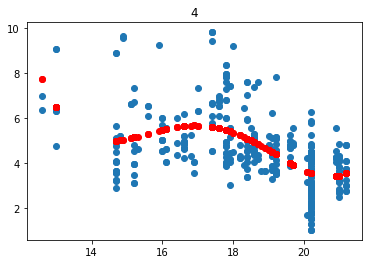

Normalized training error =  0.061728934282173374
Normalized testing error =  0.07247831875999415


In [27]:
for k in range(0,3): #Feature
    print("Feature No:",k)
    for f in range(1,6):
        print(f," - Fold")
        if(k==2):
            x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug=fold(k,f,df)
            Poly_Reg_Grad_Des(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug,4)
        else:   
            x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug=fold(k,f,df)
            Poly_Reg_Grad_Des(x_train,y_train,x_test,y_test,x_train_norm,x_train_norm_aug, x_test_norm,x_test_norm_aug,3)

Best Fit

Feature : 0
Best Fit Found is: Polynomial Degree: 2
Parameters
[4.29462469 1.13373342 0.24831023]


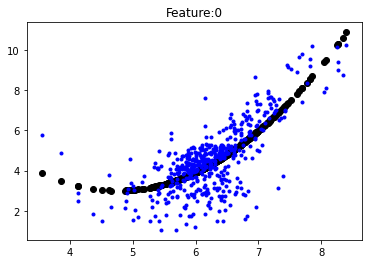

Normalized error =  0.036001508055382735


In [13]:
print("Feature : 0")
print("Best Fit Found is: Polynomial Degree: 2")
X=df[0]
Y=df[3]
x_mean = X.mean(axis=0)
x_stdev = X.std(axis=0)
x_norm = (X - x_mean)/(x_stdev)
x_norm_aug = np.c_[np.ones((x_norm.shape[0], 1)), x_norm]
reg = regression()
X_1 = data_transform(x_norm,2)
w_mat = reg.mat_inv(Y, X_1)
print("Parameters")
print(w_mat)
y_pred=X_1.T @ w_mat
plt.title("Feature:0")
plt.plot(X.T,Y,'.',color='blue')
plt.scatter(X.T,y_pred,color='black')
plt.show()
error = reg.error(w_mat, Y, X_1)/((np.max(Y)-np.mean(Y))**2)
print('Normalized error = ', error)

Feature : 1
Best Fit Found is: Polynomial Degree: 4
Parameters
[ 4.09495584 -1.09574939  0.48741211 -0.33388575  0.07528   ]


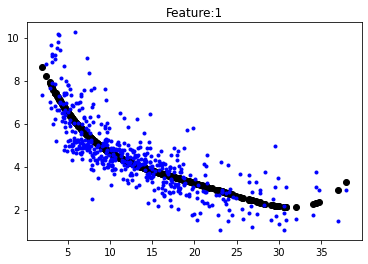

Normalized error =  0.02689178081391158


In [14]:
print("Feature : 1")
print("Best Fit Found is: Polynomial Degree: 4")
X=df[1]
Y=df[3]
x_mean = X.mean(axis=0)
x_stdev = X.std(axis=0)
x_norm = (X - x_mean)/(x_stdev)
x_norm_aug = np.c_[np.ones((x_norm.shape[0], 1)), x_norm]
reg = regression()
X_1 = data_transform(x_norm,4)
w_mat = reg.mat_inv(Y, X_1)
print("Parameters")
print(w_mat)
y_pred=X_1.T @ w_mat
plt.title("Feature:1")
plt.plot(X.T,Y,'.',color='blue')
plt.scatter(X.T,y_pred,color='black')
plt.show()
error = reg.error(w_mat, Y, X_1)/((np.max(Y)-np.mean(Y))**2)
print('Normalized error = ', error)

Feature : 2
Best Fit Found is: Polynomial Degree: 6
Parameters
[ 5.16967338 -2.14932468 -1.4046396   1.2712149   0.72099626 -0.18554326
 -0.08603643]


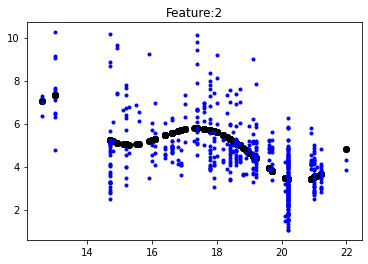

Normalized error =  0.05190368171864197


In [15]:
print("Feature : 2")
print("Best Fit Found is: Polynomial Degree: 6")
X=df[2]
Y=df[3]
x_mean = X.mean(axis=0)
x_stdev = X.std(axis=0)
x_norm = (X - x_mean)/(x_stdev)
x_norm_aug = np.c_[np.ones((x_norm.shape[0], 1)), x_norm]
reg = regression()
X_1 = data_transform(x_norm,6)
w_mat = reg.mat_inv(Y, X_1)
print("Parameters")
print(w_mat)
y_pred=X_1.T @ w_mat
plt.title("Feature:2")
plt.plot(X.T,Y,'.',color='blue')
plt.scatter(X.T,y_pred,color='black')
plt.show()
error = reg.error(w_mat, Y, X_1)/((np.max(Y)-np.mean(Y))**2)
print('Normalized error = ', error)